--- 
#### 💤 Project Name: Sleep Disorder Analysis
--- 

#### ----------------------------------------------------------------------------------------------------------------------------------------

#### EDA Goal: Explore health, lifestyle, and demographic data to understand their relationship with sleep quality and disorders.

#### "By analyzing features like sleep duration, stress, physical activity, and BMI, this EDA aims to uncover patterns and correlations that may influence sleep health. Insights from this analysis can guide feature selection for predictive modeling and highlight key factors contributing to sleep disorders."
#### ----------------------------------------------------------------------------------------------------------------------------------------


## Import Libraries 

In [1]:
# !pip install dython                               ## uncomment this install this for the theils u test

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib.gridspec as gridspec
# Tests to understand the importance
from scipy.stats import chi2_contingency
from dython.nominal import theils_u
# Ignoring warnings 
import warnings 
warnings.filterwarnings("ignore")

# view max rows and columns 
pd.set_option("Display.max_rows",None)
pd.set_option("display.max_columns",None)

## Importing Dataset 

In [3]:
data = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

# check the  dimensions
print(f"Data had { data.shape[0]} rows and { data.shape[1]} columns")


Data had 374 rows and 13 columns


### Dataset Column Descriptions

- Gender: Male or Female.
- Age: Person's age in years.
- Occupation: What job or work the person does.
- Sleep Duration (hours): How many hours the person sleeps each day.
- Quality of Sleep (4-9): How good the sleep is, rated from 4 (bad) to 9 (excellent).
- Physical Activity (minutes/day): How many minutes the person exercises each day.
- Stress Level (3-8): How stressed the person feels, rated from 3 (low) to 8 (high).
- BMI Category: Body weight status (Underweight, Normal, Overweight).
- Blood Pressure (systolic/diastolic): Blood pressure reading (e.g., 120/80).
- Heart Rate (bpm): Resting heart rate in beats per minute.
- Daily Steps: How many steps the person takes each day.
- Sleep Disorder: Type of sleep issue (None, Insomnia, or Sleep Apnea).


---
## Numerical columns and Categorical columns
---

In [4]:
nums_cols = []
cats_cols = []
for cols in data.columns:
    if data[cols].dtypes == "O":
        cats_cols.append(cols)
    else:
        nums_cols.append(cols) 
print(f"Data had {len(nums_cols)} numerical columns  and {len(cats_cols)} categorical columns")
print("=======================================")
print(f"Numerical columns are : \n{nums_cols}")
print("=======================================")
print(f"Categorical columns are : \n{cats_cols}")

Data had 8 numerical columns  and 5 categorical columns
Numerical columns are : 
['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
Categorical columns are : 
['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']


## Data sample

In [5]:
data.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


## Missing Values and Duplicates 

In [6]:
missing_duplicates = pd.DataFrame({"Data types":data.dtypes,
                                   "Missing Values":data.isnull().sum(),
                                   "Duplicates":data.duplicated().sum()})
missing_duplicates

,Data types,Missing Values,Duplicates
Person ID,int64,0,0
Gender,object,0,0
Age,int64,0,0
Occupation,object,0,0
Sleep Duration,float64,0,0
Quality of Sleep,int64,0,0
Physical Activity Level,int64,0,0
Stress Level,int64,0,0
BMI Category,object,0,0
Blood Pressure,object,0,0


#### column : Sleep Disorder

In [7]:
# lets check the Target column
data["Sleep Disorder"].value_counts(dropna=False)

Sleep Disorder
NaN            219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

- ###  Observation

- There are **219 missing values** in the target column **`Sleep Disorder`**.
- We'll replace the `NaN` values with **`No Disorder`** .
- Dropping the `Person ID` column as it is a personal identifier.It does not contribute to analysis or modeling and may pose privacy concerns.

In [8]:
# Replacing NaN with No Disorder 
data["Sleep Disorder"] = data["Sleep Disorder"].fillna("No Disorder")

In [9]:
data["Sleep Disorder"].value_counts(dropna=False)

Sleep Disorder
No Disorder    219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

In [10]:
data = data.drop(columns = "Person ID")

In [11]:
## Updated list of nums and cats columns 
nums_cols = []
cats_cols = []
for cols in data.columns:
    if data[cols].dtypes == "O":
        cats_cols.append(cols)
    else:
        nums_cols.append(cols) 
print(f"Data had {len(nums_cols)} numerical columns  and {len(cats_cols)} categorical columns")
print("=======================================")
print(f"Updated Numerical columns are : \n{nums_cols}")
print("=======================================")
print(f"Updated Categorical columns are : \n{cats_cols}")

Data had 7 numerical columns  and 5 categorical columns
Updated Numerical columns are : 
['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
Updated Categorical columns are : 
['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']


## Unique Features in columns 

In [12]:
print(f"Unique features in Categorical columns:")
for cols in cats_cols:
    print(cols,":",data[cols].nunique())
print("========================================")
print(f"Unique features in Numerical columns:")
for cols in nums_cols:
    print(cols,":",data[cols].nunique())    

Unique features in Categorical columns:
Gender : 2
Occupation : 11
BMI Category : 4
Blood Pressure : 25
Sleep Disorder : 3
Unique features in Numerical columns:
Age : 31
Sleep Duration : 27
Quality of Sleep : 6
Physical Activity Level : 16
Stress Level : 6
Heart Rate : 19
Daily Steps : 20


## EDA - Exploratory Data Analysis.

### Analyse the Target column (Sleep Disorder)

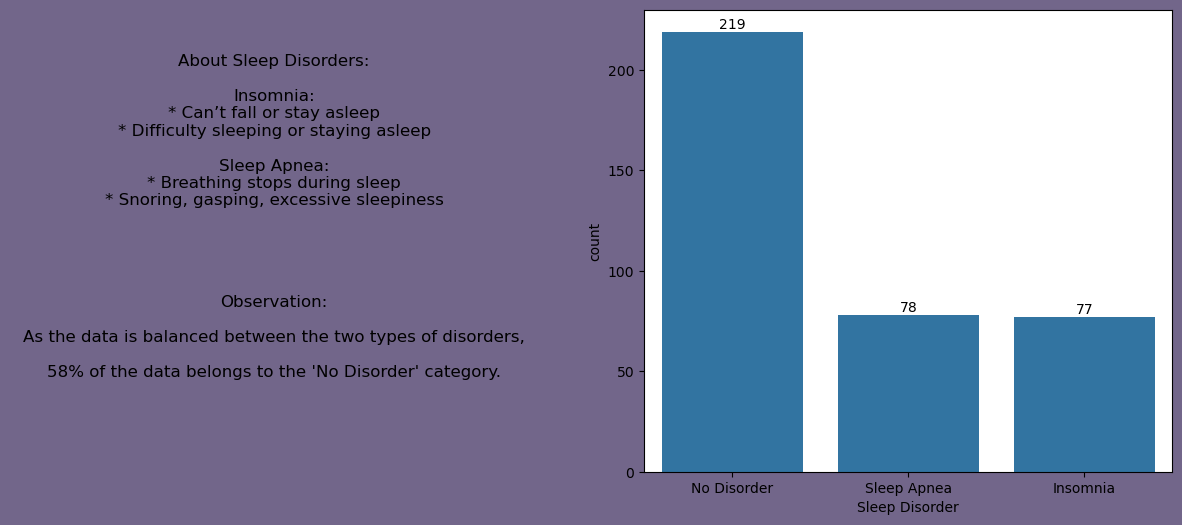

In [13]:
fig , axes = plt.subplots(1,2,figsize = (15,6))
axes =axes.flatten()
fig.patch.set_facecolor("#72668a")

axes[0].axis("off")
target_text = (
    "About Sleep Disorders:\n\n"
    "Insomnia:\n"
    "* Can’t fall or stay asleep\n"
    "* Difficulty sleeping or staying asleep\n\n"
    "Sleep Apnea:\n"
    "* Breathing stops during sleep\n"
    "* Snoring, gasping, excessive sleepiness\n\n"
)
target_text_analyse = (
    "Observation:\n\n"
    "As the data is balanced between the two types of disorders,\n\n"
    "58% of the data belongs to the 'No Disorder' category."
)
axes[0].text(0.5,0.7,target_text ,ha= "center" , va="center" , fontsize = 12)
axes[0].text(0.5,0.2,target_text_analyse ,ha= "center" , va="bottom" , fontsize = 12)

bx= sns.countplot(x=data["Sleep Disorder"], ax = axes[1])
bx.bar_label(bx.containers[0])
plt.show()

---
## Univariate analysis on Categorical columns
---

#### column : Gender and BMI Category

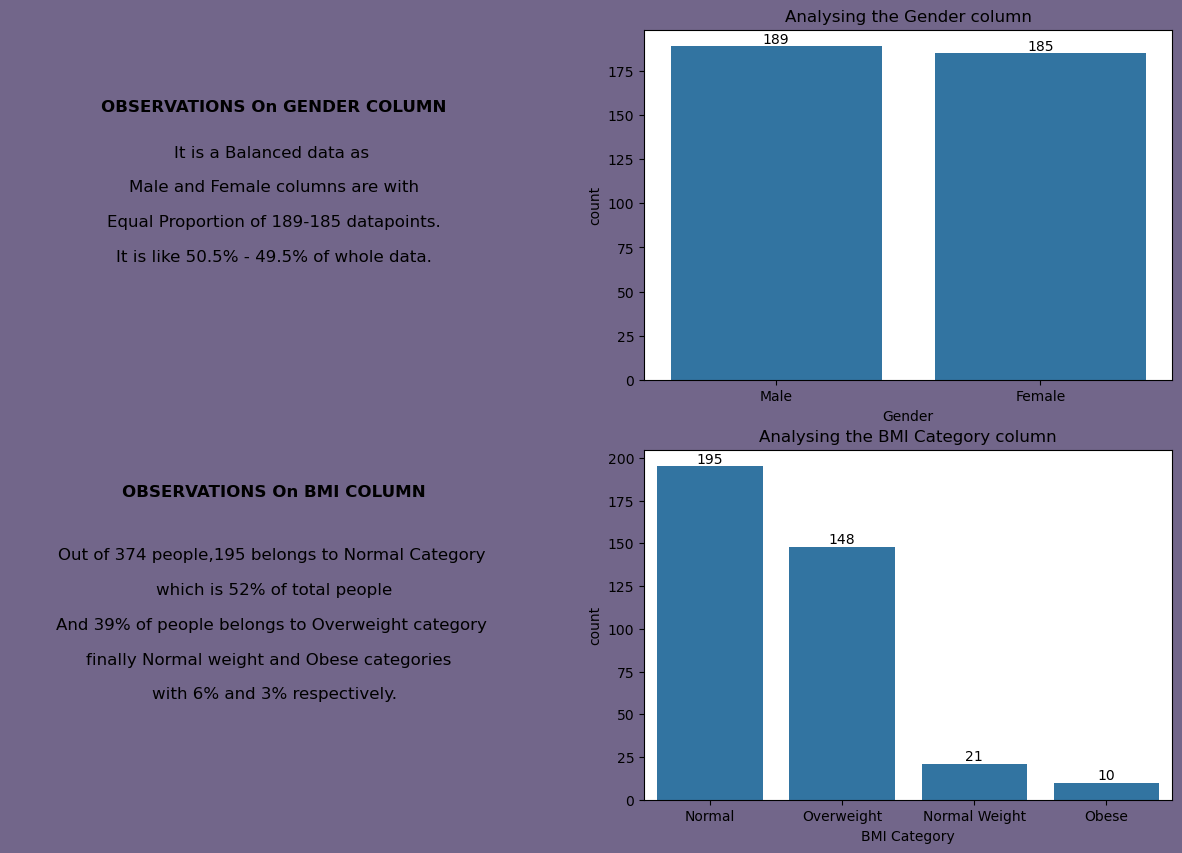

In [14]:
# About Gender and BMI Category

fig , axes = plt.subplots(2,2,figsize = (15,10))
axes =axes.flatten()
fig.patch.set_facecolor("#72668a")

plot_axes = [1, 3]
columns = ['Gender', 'BMI Category']
for i, col in zip(plot_axes, columns):
    sns.countplot(x=data[col], ax=axes[i] , order = data[col].value_counts().index)
    axes[i].bar_label(axes[i].containers[0])
    axes[i].set_title(f"Analysing the {col} column")

text_axes = [0,2]
for i in text_axes:
    axes[i].axis("off")
gender_text = (
    "It is a Balanced data as \n\n"
    "Male and Female columns are with\n\n"
    "Equal Proportion of 189-185 datapoints.\n\n"
    "It is like 50.5% - 49.5% of whole data."
)
BMI_text = (
    "Out of 374 people,195 belongs to Normal Category \n\n"
    "which is 52% of total people\n\n"
    "And 39% of people belongs to Overweight category \n\n"
    "finally Normal weight and Obese categories  \n\n"
    "with 6% and 3% respectively."
)

axes[0].text(0.5,0.8,"OBSERVATIONS On GENDER COLUMN",ha= "center" , va="top" , fontsize = 12 , weight = "bold")
axes[0].text(0.5,0.5,gender_text ,ha= "center" , va="center" , fontsize = 12)
axes[2].text(0.5,0.9,"OBSERVATIONS On BMI COLUMN",ha= "center" , va="top" , fontsize = 12 , weight = "bold")
axes[2].text(0.5,0.5,BMI_text ,ha= "center" , va="center" , fontsize = 12)


plt.show()
        

#### column : Occupation

Number of people in Occupation wise:

              Occupation  Count
0                  Nurse     73
1                 Doctor     71
2               Engineer     63
3                 Lawyer     47
4                Teacher     40
5             Accountant     37
6            Salesperson     32
7      Software Engineer      4
8              Scientist      4
9   Sales Representative      2
10               Manager      1


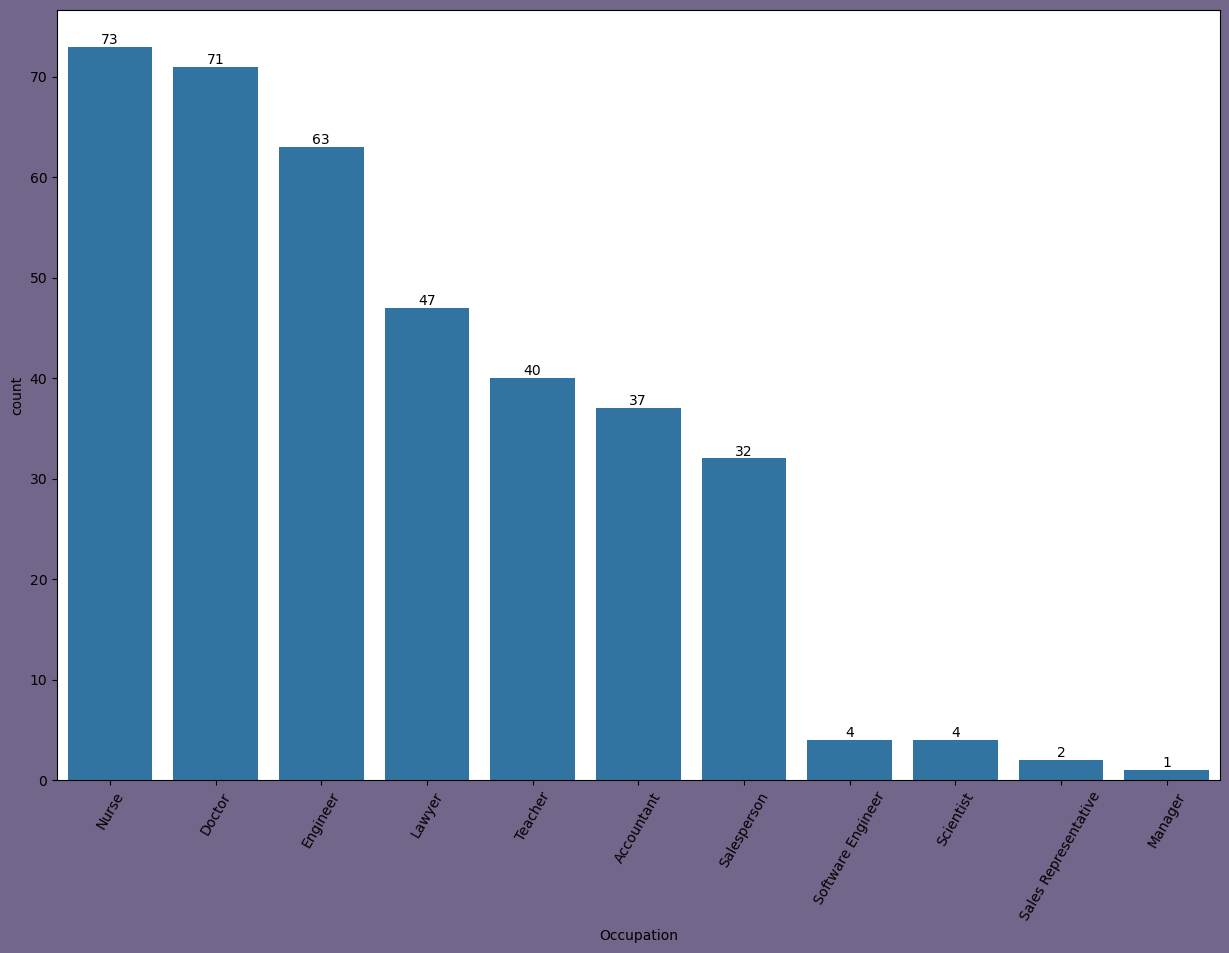

In [15]:
# About the Occupation 
print("Number of people in Occupation wise:\n")
print(data["Occupation"].value_counts().reset_index(name="Count"))

plt.figure(figsize = (15,10) , facecolor = "#72668a")
bx = sns.countplot(x=data["Occupation"],order = data["Occupation"].value_counts().index)
bx.bar_label(bx.containers[0])
bx.set_xticklabels(bx.get_xticklabels(), rotation=60)
plt.show()

#### column : Blood Pressure

In [16]:
# About Blood Pressure
# lets convert the BP to numerical values 
# Split 'Blood Pressure' into 'Systolic' and 'Diastolic'
data[['Systolic', 'Diastolic']] = data["Blood Pressure"].str.split("/",expand = True ).astype("int")

In [17]:
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90


In [18]:
data["Systolic"].value_counts()

Systolic
130    101
140     69
125     69
120     45
115     34
135     29
128      5
132      3
118      3
126      2
119      2
142      2
131      2
129      2
117      2
139      2
121      1
122      1
Name: count, dtype: int64

In [19]:
data["Diastolic"].value_counts()

Diastolic
80    111
85    102
95     65
75     34
90     31
82      4
86      4
84      4
87      3
76      3
92      2
83      2
77      2
78      2
88      2
91      2
79      1
Name: count, dtype: int64

# lets create some conditions and categories to this 
Note: According to standard BP guidelines:
- Normal: <120/80 mmHg
- Elevated: 120–129 systolic and <80 diastolic
- Hypertension Stage 1: 130–139 systolic or 80–89 diastolic
- Hypertension Stage 2: ≥140 systolic or ≥90 diastolic


In [20]:
cond1 = (data["Systolic"] < 120) & (data["Diastolic"] < 80)
cond2 = (data["Systolic"].between(120, 129)) & (data["Diastolic"] < 80)
cond3 = (data["Systolic"].between(130, 139)) | (data["Diastolic"].between(80, 89))
cond4 = (data["Systolic"] >= 140) | (data["Diastolic"] >= 90)
choices = ["Normal", "Elevated", "Hypertension Stage 1", "Hypertension Stage 2"]
data["BP Category"] = np.select([cond1,cond2,cond3,cond4],choices ,default = "Unclassified")
data["BP Category"].value_counts()

BP Category
Hypertension Stage 1    261
Hypertension Stage 2     71
Normal                   41
Elevated                  1
Name: count, dtype: int64

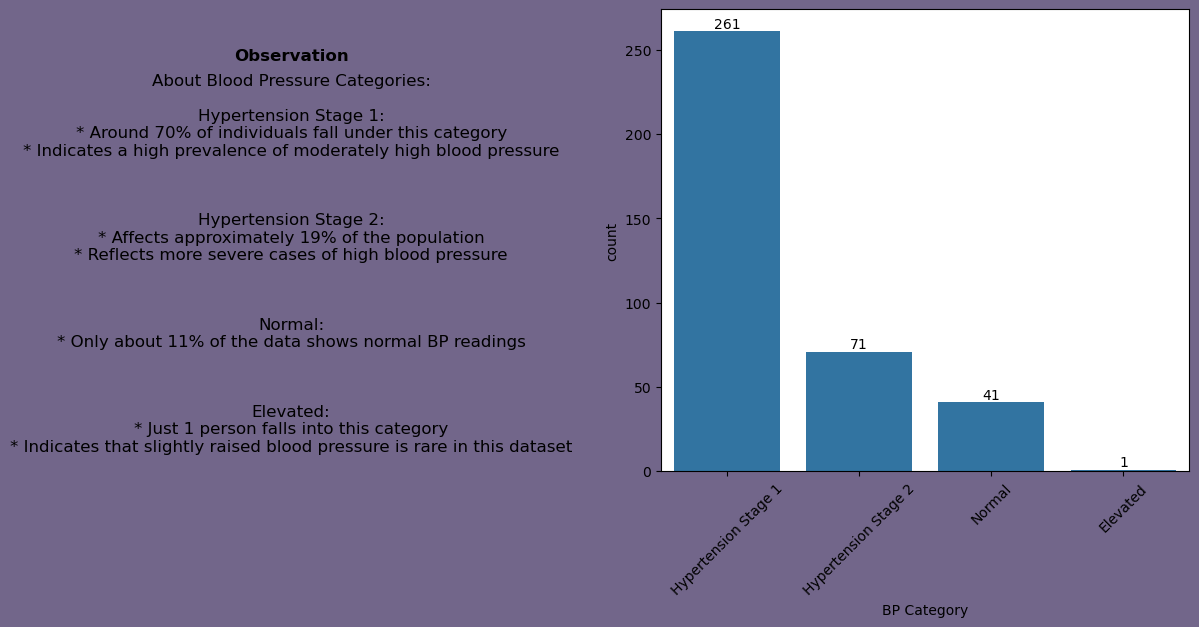

In [21]:
# graphically 
fig , axes = plt.subplots(1,2,figsize = (15,6))
axes =axes.flatten()
fig.patch.set_facecolor("#72668a")

axes[0].axis("off")
bp_category_text = (
    "About Blood Pressure Categories:\n\n"
    "Hypertension Stage 1:\n"
    "* Around 70% of individuals fall under this category\n"
    "* Indicates a high prevalence of moderately high blood pressure\n\n\n\n"
    "Hypertension Stage 2:\n"
    "* Affects approximately 19% of the population\n"
    "* Reflects more severe cases of high blood pressure\n\n\n\n"
    "Normal:\n"
    "* Only about 11% of the data shows normal BP readings\n\n\n\n"
    "Elevated:\n"
    "* Just 1 person falls into this category\n"
    "* Indicates that slightly raised blood pressure is rare in this dataset\n"
)

axes[0].text(0.5,0.9,"Observation",ha= "center" , va="center" , fontsize = 12 , weight = "bold")
axes[0].text(0.5,0.0,bp_category_text ,ha= "center" , va="bottom" , fontsize = 12)

bx= sns.countplot(x=data["BP Category"], ax = axes[1])
bx.bar_label(bx.containers[0])
bx.set_xticklabels(bx.get_xticklabels(), rotation=45)

plt.show()

---
### Observations - On Categorical columns (Univariate)
---

## Sleep Disorder Analysis:

- The dataset is balanced between the two types of disorders,whereas 58% of the data belongs to the 'No Disorder' category.

## Gender Analysis:

- It is a balanced dataset as Male and Female columns have an almost equal proportion — 189 and 185 data points respectively. 
- This accounts for roughly 50.5% Male and 49.5% Female.

## BMI Category Analysis:

- Out of 374 people, 195 belong to the 'Normal' category (52%).
- Around 39% fall under 'Overweight', while 'Normal Weight' and 'Obese' categories make up 6% and 3% of the data respectively.

## Occupation Analysis:

- Doctors and Nurses make up the largest group in the dataset, each contributing around 19%, totaling approximately 38% from the medical field.
- Engineers represent about 17% of the dataset, while Lawyers account for roughly 12%.
- Teachers, Accountants, and Salespersons make up a small but nearly equal share of the data, contributing approximately 11%, 10%, and 9% respectively.
- A very small portion of the dataset includes Software Engineers (4), Scientists (4), Sales Representatives (2), and Managers (1)

## Blood Pressure Analysis:
#### Systolic Pressure:
- 130 mmHg is the most common value, appearing in 27% of the data — slightly above normal.
- 125 mmHg and 140 mmHg follow, each around 18%, indicating borderline and high BP respectively.
- About 21% fall in the normal to slightly low range (115–120).
- The remaining 16% is scattered across values from 117 to 135, each with low frequency.

#### Diastolic Pressure:
- 57% of records lie in the normal to borderline high range (80–85 mmHg).
- 26% show elevated diastolic levels (90–95 mmHg).
- 10% fall at 75 mmHg, slightly low.
- The last 7% is sparsely spread across 76–92 mmHg with minimal counts.

#### BP Category
- About 70% of the individuals fall under 'Hypertension Stage 1',indicating a high prevalence of moderately high blood pressure.
- 'Hypertension Stage 2' affects around 19% of the population.Only 11% of the data shows normal blood pressure readings.
- Just 1 person is categorized under 'Elevated', indicating rarity in that range.


---
## Univariate analysis on Numerical columns
---

In [22]:
for cols in nums_cols:
    print(cols,":",data[cols].nunique())

Age : 31
Sleep Duration : 27
Quality of Sleep : 6
Physical Activity Level : 16
Stress Level : 6
Heart Rate : 19
Daily Steps : 20


#### column : Age

In [23]:
# About Age 
data["Age"].describe()

count    374.000000
mean      42.184492
std        8.673133
min       27.000000
25%       35.250000
50%       43.000000
75%       50.000000
max       59.000000
Name: Age, dtype: float64

In [24]:
# check the outliers in the age 
age_q1 = data["Age"].quantile(0.25)
age_q3 = data["Age"].quantile(0.75)
iqr = age_q3 - age_q1
upper_age = age_q3 + (1.5 * iqr)
lower_age = age_q1 - (1.5 * iqr)
print(data["Age"].quantile(0.25))  # ~30
print(data["Age"].quantile(0.75))  # ~50


# outliers in age column 
age_outliers = data[(data["Age"] > upper_age) | (data["Age"] < lower_age) ]
print(f"Lower bound for outliers: {lower_age}")
print(f"Upper bound for outliers: {upper_age}")
print("\nOutliers:")
print(age_outliers)           # No outliers were found in Age column

35.25
50.0
Lower bound for outliers: 13.125
Upper bound for outliers: 72.125

Outliers:
Empty DataFrame
Columns: [Gender, Age, Occupation, Sleep Duration, Quality of Sleep, Physical Activity Level, Stress Level, BMI Category, Blood Pressure, Heart Rate, Daily Steps, Sleep Disorder, Systolic, Diastolic, BP Category]
Index: []


In [25]:
# lets create some bins for the age columns 
bins = [ 0,30,40,50,60]
labels = [ "less than 30","between 31-40","between 41-50","above 50"]
age_bins = pd.cut(data["Age"],bins = bins , labels = labels ,right=True, include_lowest=True)
age_bins.value_counts()

Age
between 31-40    133
between 41-50    133
above 50          76
less than 30      32
Name: count, dtype: int64

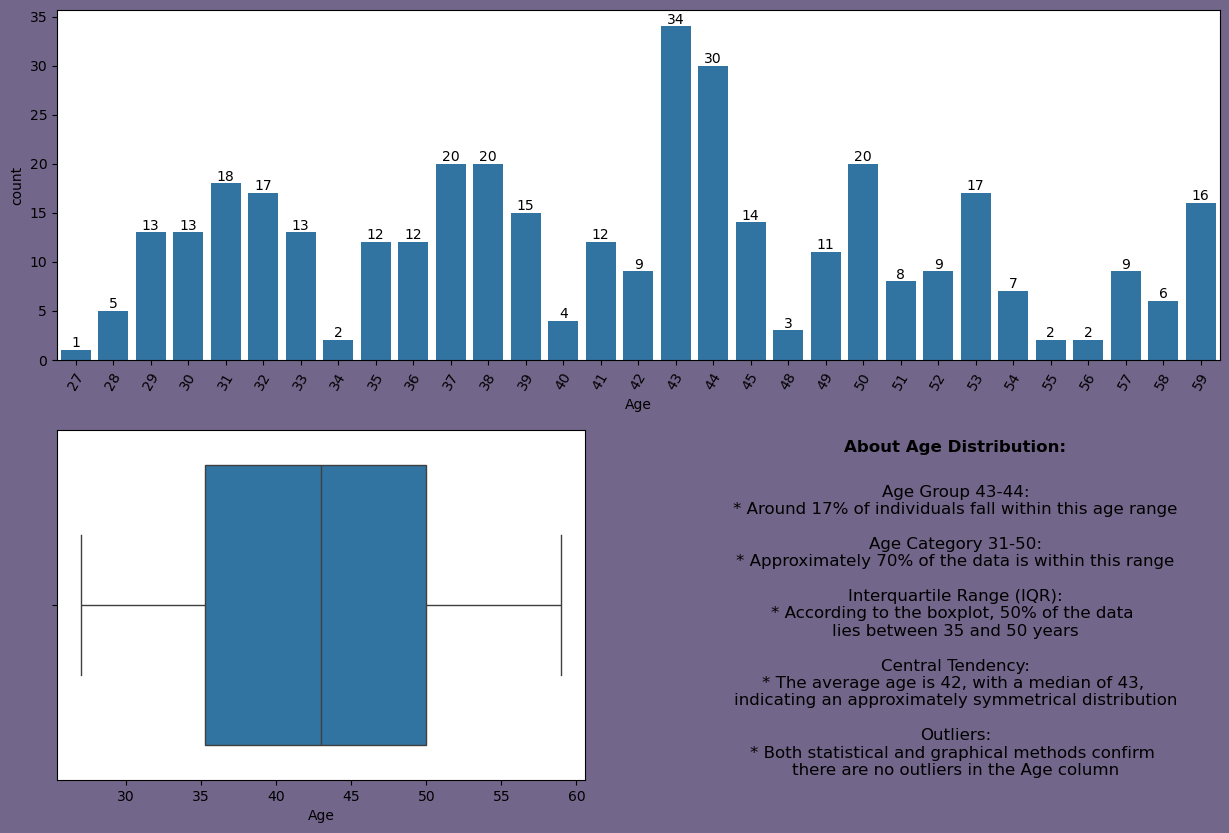

In [26]:
fig = plt.figure(figsize=(15,10))
fig.patch.set_facecolor("#72668a")

gs = gridspec.GridSpec(2,2,figure = fig )

ax_0 = fig.add_subplot(gs[0,:])
bx= sns.countplot(x=data["Age"], ax=ax_0)
bx.bar_label(bx.containers[0])
bx.set_xticklabels(bx.get_xticklabels(), rotation=60)

ax_1=fig.add_subplot(gs[1,0])
sns.boxplot(x=data["Age"], ax=ax_1 , legend = "brief")

age_analysis_text = (
    "Age Group 43-44:\n"
    "* Around 17% of individuals fall within this age range\n\n"
    "Age Category 31-50:\n"
    "* Approximately 70% of the data is within this range\n\n"
    "Interquartile Range (IQR):\n"
    "* According to the boxplot, 50% of the data \nlies between 35 and 50 years\n\n"
    "Central Tendency:\n"
    "* The average age is 42, with a median of 43, \nindicating an approximately symmetrical distribution\n\n"
    "Outliers:\n"
    "* Both statistical and graphical methods confirm \nthere are no outliers in the Age column\n"
)
ax_2=fig.add_subplot(gs[1,1])
ax_2.axis("off")
ax_2.text(0.5,0.9,"About Age Distribution:\n\n",ha = "center" , va= "center" ,fontsize = 12,weight = "bold")
ax_2.text(0.5,0.4,age_analysis_text,ha = "center" , va= "center" ,fontsize = 12)

plt.show()

### Age column analysis
- Around 17% of people fall between the 43 and 44 age group, with about 70% in the 31-50 age category.
- According to the boxplot, 50% of the data lies between 35 and 50 years, representing the interquartile range.
- The average age is 42, and the median is 43, indicating an approximately symmetrical age distribution.
- Both statistical methods and graphical analysis confirm there are no outliers in the Age column.
- Overall, the Age data is clean, well-distributed, and suitable for further analysis.

#### column : Quality of Sleep 

In [27]:
data["Quality of Sleep"].unique()

array([6, 4, 7, 5, 8, 9], dtype=int64)

In [28]:
print(round(data["Quality of Sleep"].value_counts(normalize= True)*100,2))
print("===========================================")
labels = ["Poor Quality of sleep","Good Quality of sleep","Excellent Quality of sleep"]
bins = [4,6,8,10]
sleep_quality_bins = pd.cut(data["Quality of Sleep"], bins= bins , labels = labels , right = False)
sleep_quality_bins.value_counts()

Quality of Sleep
8    29.14
6    28.07
7    20.59
9    18.98
5     1.87
4     1.34
Name: proportion, dtype: float64


Quality of Sleep
Good Quality of sleep         182
Excellent Quality of sleep    180
Poor Quality of sleep          12
Name: count, dtype: int64

In [29]:
data["Quality of Sleep"].describe()

count    374.000000
mean       7.312834
std        1.196956
min        4.000000
25%        6.000000
50%        7.000000
75%        8.000000
max        9.000000
Name: Quality of Sleep, dtype: float64

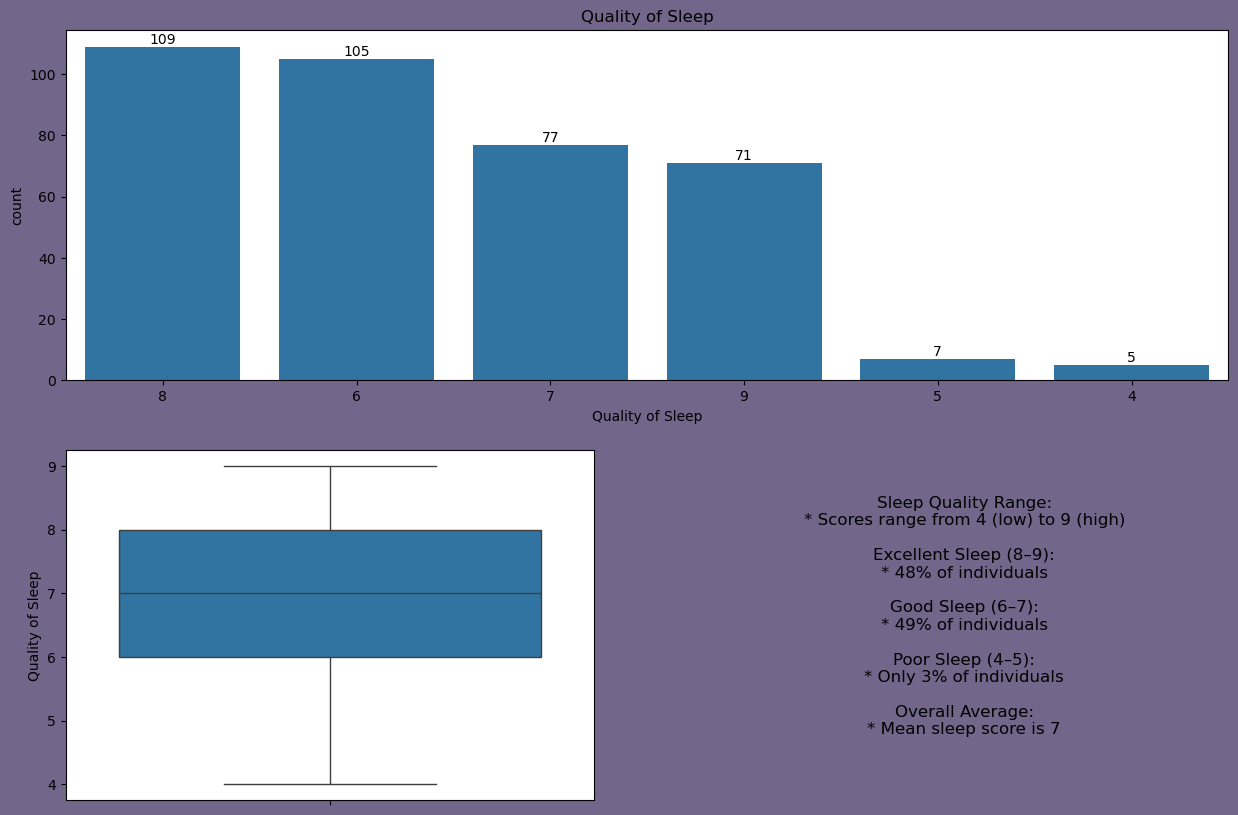

In [30]:
# graphically 
fig = plt.figure(figsize = (15,10))
fig.patch.set_facecolor("#72668a")

gs = gridspec.GridSpec(2,2 , figure = fig)

ax_0 = fig.add_subplot(gs[0,:])
bx = sns.countplot(x=data["Quality of Sleep"] , order=data["Quality of Sleep"].value_counts().index, ax = ax_0)
bx.bar_label(bx.containers[0])
bx.set_title("Quality of Sleep")

ax_1 = fig.add_subplot(gs[1,0])
sns.boxplot(data["Quality of Sleep"] , ax = ax_1)

ax_2 = fig.add_subplot(gs[1,1])
ax_2.axis("off")
sleep_quality_analysis = (
    "Sleep Quality Range:\n"
    "* Scores range from 4 (low) to 9 (high)\n\n"
    "Excellent Sleep (8–9):\n"
    "* 48% of individuals\n\n"
    "Good Sleep (6–7):\n"
    "* 49% of individuals\n\n"
    "Poor Sleep (4–5):\n"
    "* Only 3% of individuals\n\n"
    "Overall Average:\n"
    "* Mean sleep score is 7\n"
)   
ax_2.text(0.5,0.5,sleep_quality_analysis ,ha = "center", va = "center" , fontsize = 12)

plt.show()

### Quality of Sleep column analysis
- It ranges between 4 ( low quality of sleep) to 9 ( high quality of sleep).
- Around 48% of people had Excellent quality sleep (score 8 or 9).
- Around 49% had average Good quality sleep (score 6 or 7).
- Only about 3% had poor sleep quality (score 4 or 5).
- On an Average the sleep of quality of people is at score 7.
- 50% of data lies in the range between 6-8 quality of sleep.


#### column : Stress level

In [31]:
data["Stress Level"].unique()

array([6, 8, 7, 4, 3, 5], dtype=int64)

In [32]:
data["Stress Level"].unique()

array([6, 8, 7, 4, 3, 5], dtype=int64)

In [33]:
print(round(data["Stress Level"].value_counts(normalize= True)*100,2))
print("===========================================")
labels = ["Low stress","Reasonable stress","High stress"]
bins = [3,5,7,9]
sleep_quality_bins = pd.cut(data["Stress Level"], bins= bins , labels = labels , right = False)
sleep_quality_bins.value_counts()

Stress Level
3    18.98
8    18.72
4    18.72
5    17.91
7    13.37
6    12.30
Name: proportion, dtype: float64


Stress Level
Low stress           141
High stress          120
Reasonable stress    113
Name: count, dtype: int64

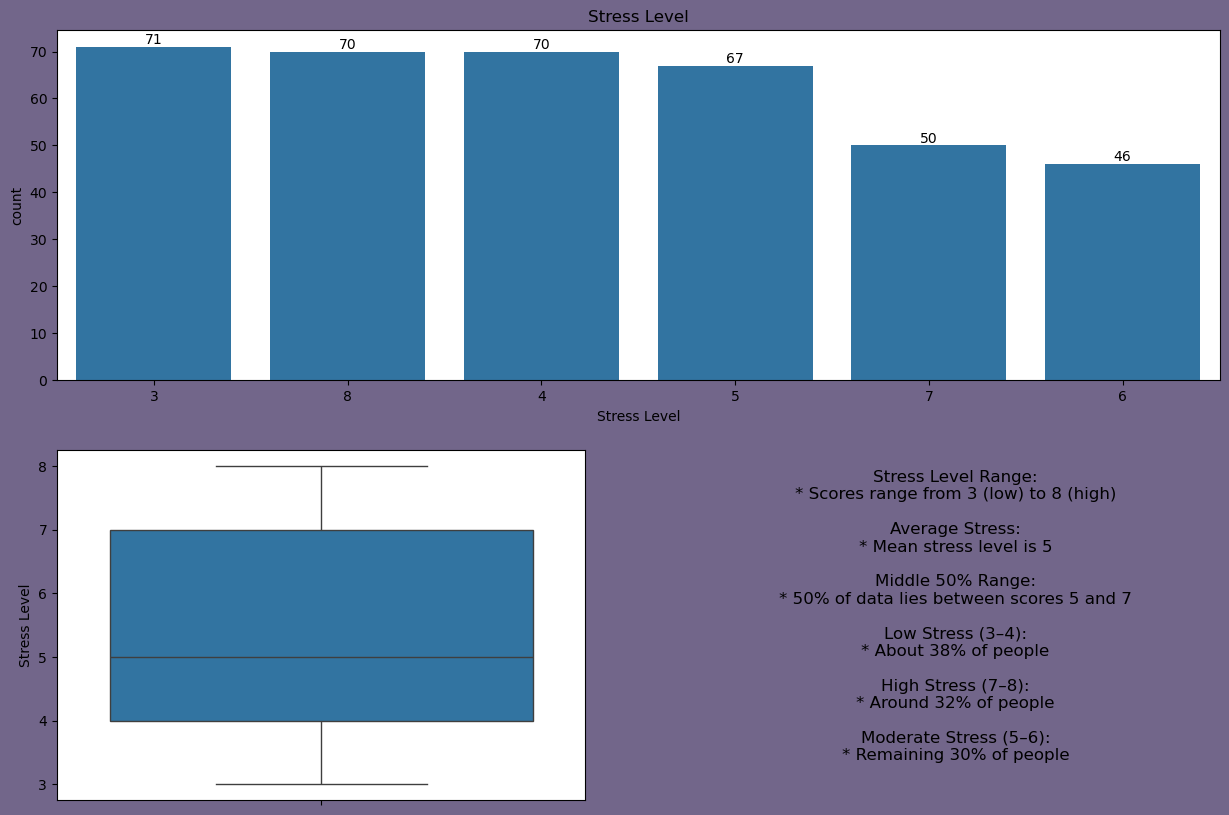

In [34]:
# graphically 
fig = plt.figure(figsize = (15,10))
fig.patch.set_facecolor("#72668a")

gs = gridspec.GridSpec(2,2 , figure = fig)

ax_0 = fig.add_subplot(gs[0,:])
bx = sns.countplot(x=data["Stress Level"] , order=data["Stress Level"].value_counts().index, ax = ax_0)
bx.bar_label(bx.containers[0])
bx.set_title("Stress Level")

ax_1 = fig.add_subplot(gs[1,0])
sns.boxplot(data["Stress Level"] , ax = ax_1)

ax_2 = fig.add_subplot(gs[1,1])
ax_2.axis("off")
stress_analysis_text = (
    "Stress Level Range:\n"
    "* Scores range from 3 (low) to 8 (high)\n\n"
    "Average Stress:\n"
    "* Mean stress level is 5\n\n"
    "Middle 50% Range:\n"
    "* 50% of data lies between scores 5 and 7\n\n"
    "Low Stress (3–4):\n"
    "* About 38% of people\n\n"
    "High Stress (7–8):\n"
    "* Around 32% of people\n\n"
    "Moderate Stress (5–6):\n"
    "* Remaining 30% of people\n"
)
   
ax_2.text(0.5,0.5,stress_analysis_text ,ha = "center", va = "center" , fontsize = 12)

plt.show()

### Stress Level column analysis
- It ranges between 3 ( low stress level) to 8( high stress level).
- On an Average the stress level for people is at score 5.
- 50% of data lies in the range between 5-7 stress level.
- Around 38% of people are having low level of stress (score 3 or 4).
- Around 32% people are suffering with high stress level (score 7 or 8).
- Rest 30% of people are at reasonable stress level(score 5 or 6)

#### column :Daily Steps

In [35]:
print(f"Number of Unique features there in this data are {len(list(data["Daily Steps"].unique()))}")
data["Daily Steps"].unique()

Number of Unique features there in this data are 20


array([ 4200, 10000,  3000,  3500,  8000,  4000,  4100,  6800,  5000,
        7000,  5500,  5200,  5600,  3300,  4800,  7500,  7300,  6200,
        6000,  3700], dtype=int64)

In [36]:
data["Daily Steps"].describe()

count      374.000000
mean      6816.844920
std       1617.915679
min       3000.000000
25%       5600.000000
50%       7000.000000
75%       8000.000000
max      10000.000000
Name: Daily Steps, dtype: float64

In [37]:
data["Daily Steps"].value_counts().head(6)

Daily Steps
8000     101
6000      68
5000      68
7000      66
10000     36
5500       4
Name: count, dtype: int64

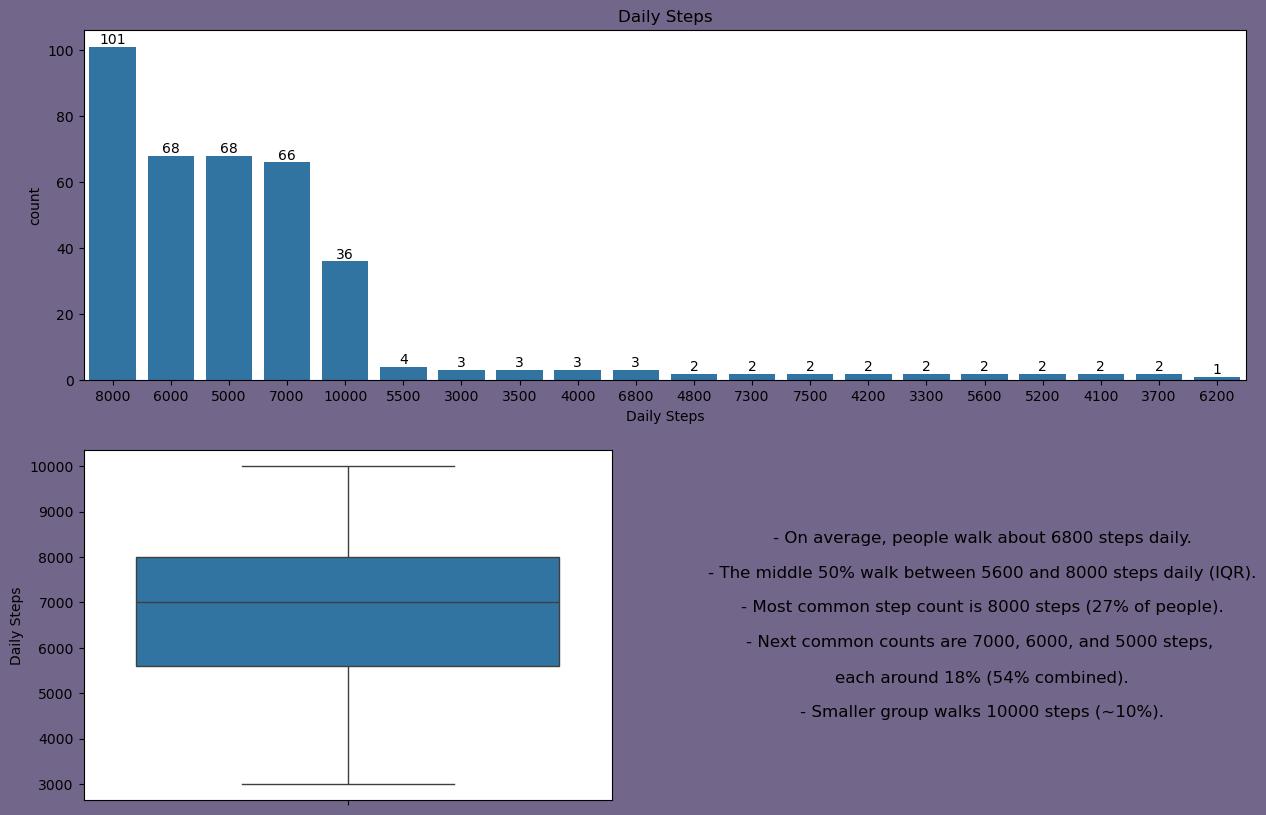

In [38]:
# graphically 
fig = plt.figure(figsize = (15,10))
fig.patch.set_facecolor("#72668a")

gs = gridspec.GridSpec(2,2 , figure = fig)

ax_0 = fig.add_subplot(gs[0,:])
bx = sns.countplot(x=data["Daily Steps"] , order=data["Daily Steps"].value_counts().index, ax = ax_0)
bx.bar_label(bx.containers[0])
bx.set_title("Daily Steps")

ax_1 = fig.add_subplot(gs[1,0])
sns.boxplot(data["Daily Steps"] , ax = ax_1)

ax_2 = fig.add_subplot(gs[1,1])
ax_2.axis("off")
dailystep_analysis_text = (
    "- On average, people walk about 6800 steps daily.\n\n"
    "- The middle 50% walk between 5600 and 8000 steps daily (IQR).\n\n"
    "- Most common step count is 8000 steps (27% of people).\n\n"
    "- Next common counts are 7000, 6000, and 5000 steps, \n\neach around 18% (54% combined).\n\n"
    "- Smaller group walks 10000 steps (~10%)."
)
   
ax_2.text(0.5,0.5,dailystep_analysis_text ,ha = "center", va = "center" , fontsize = 12)
plt.show()

### Daily Steps column analysis
- On average, people walk about 6800 steps daily.
- The middle 50% of people walk between 5600 and 8000 steps daily (IQR range).
- The most common step count is 8000 steps per day, with around 27% of people.
- Following that, 7000, 6000, and 5000 steps are also common, each representing roughly 18% (54% combined).
- Smaller groups walk 10000 steps (about 10%) 


#### column : Physical Activity Level

In [39]:
data["Physical Activity Level"].describe()

count    374.000000
mean      59.171123
std       20.830804
min       30.000000
25%       45.000000
50%       60.000000
75%       75.000000
max       90.000000
Name: Physical Activity Level, dtype: float64

In [40]:
print(f"Number of Unique features there in this data are {len(list(data["Physical Activity Level"].unique()))}")
data["Physical Activity Level"].unique()

Number of Unique features there in this data are 16


array([42, 60, 30, 40, 75, 35, 45, 50, 32, 70, 80, 55, 90, 47, 65, 85],
      dtype=int64)

In [41]:
data["Physical Activity Level"].value_counts()

Physical Activity Level
60    70
30    68
45    68
75    67
90    67
40     6
55     6
35     4
50     4
70     3
42     2
32     2
80     2
65     2
85     2
47     1
Name: count, dtype: int64

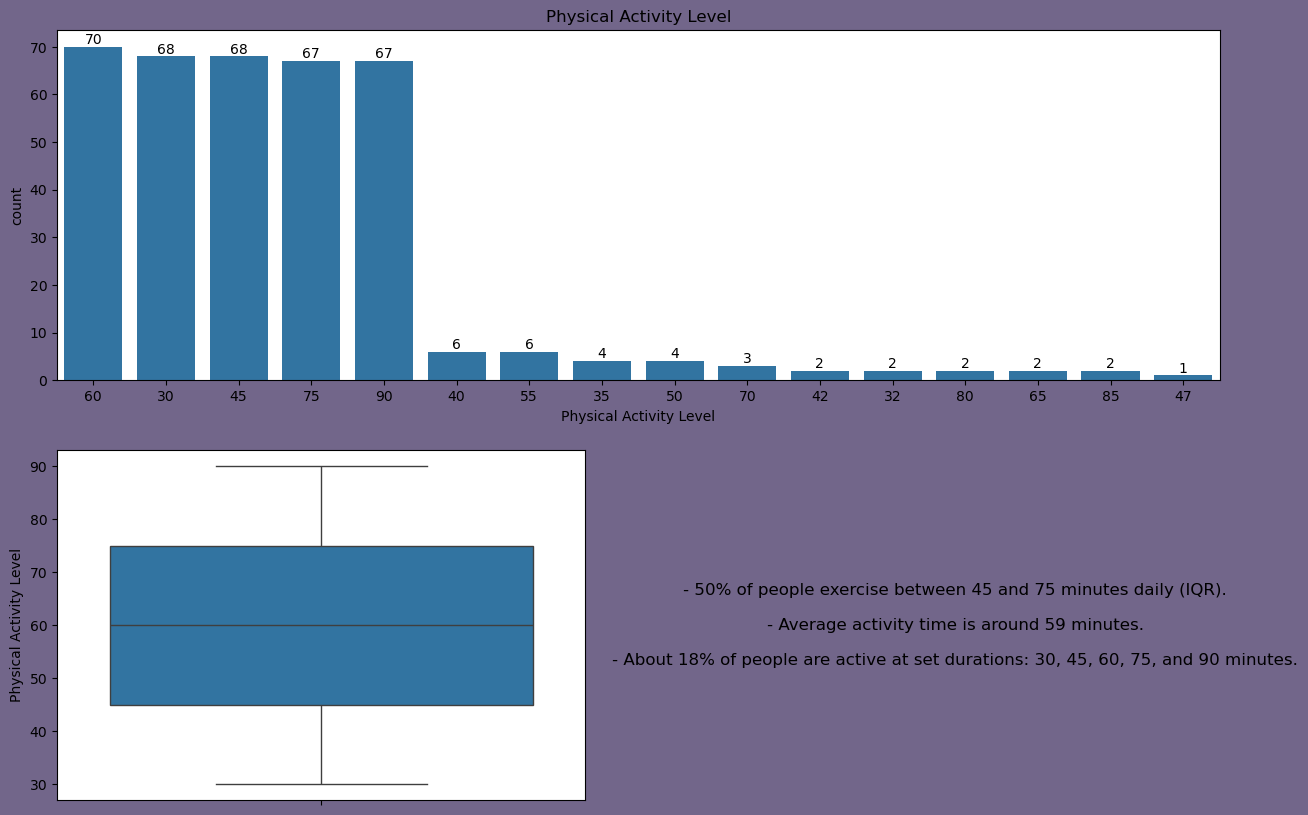

In [42]:
# graphically 
fig = plt.figure(figsize = (15,10))
fig.patch.set_facecolor("#72668a")

gs = gridspec.GridSpec(2,2 , figure = fig)

ax_0 = fig.add_subplot(gs[0,:])
bx = sns.countplot(x=data["Physical Activity Level"] , order=data["Physical Activity Level"].value_counts().index, ax = ax_0)
bx.bar_label(bx.containers[0])
bx.set_title("Physical Activity Level")

ax_1 = fig.add_subplot(gs[1,0])
sns.boxplot(data["Physical Activity Level"] , ax = ax_1)

ax_2 = fig.add_subplot(gs[1,1])
ax_2.axis("off")
Physical_analysis_text = (
    "- 50% of people exercise between 45 and 75 minutes daily (IQR).\n\n"
    "- Average activity time is around 59 minutes.\n\n"
    "- About 18% of people are active at set durations: 30, 45, 60, 75, and 90 minutes."
)

   
ax_2.text(0.5,0.5,Physical_analysis_text ,ha = "center", va = "center" , fontsize = 12)
plt.show()

### Physical activity column analysis
- Half of the individuals engage in physical activity for 45 to 75 minutes per day (IQR).
- The average activity duration is approximately 59 minutes.
- Interestingly, about 18% of people consistently exercise at standard intervals such as 30, 45, 60, 75, and 90 minutes.


#### column :Sleep Duration

In [43]:
data["Sleep Duration"].describe()

count    374.000000
mean       7.132086
std        0.795657
min        5.800000
25%        6.400000
50%        7.200000
75%        7.800000
max        8.500000
Name: Sleep Duration, dtype: float64

In [44]:
print(f"Number of Unique features there in this data are {len(list(data["Sleep Duration"].unique()))}")
data["Sleep Duration"].unique()

Number of Unique features there in this data are 27


array([6.1, 6.2, 5.9, 6.3, 7.8, 6. , 6.5, 7.6, 7.7, 7.9, 6.4, 7.5, 7.2,
       5.8, 6.7, 7.3, 7.4, 7.1, 6.6, 6.9, 8. , 6.8, 8.1, 8.3, 8.5, 8.4,
       8.2])

In [45]:
data["Sleep Duration"].value_counts().head()

Sleep Duration
7.2    36
6.0    31
7.8    28
6.5    26
6.1    25
Name: count, dtype: int64

In [46]:
# lets create some bins 
bins = [4.99,6,7,8,9]
labels = ["more than 5 to upto 6 hours","more than 6 to upto 7 hours","more than 7 to upto 8 hours","more than 8 hours"]
sleep_bins = pd.cut(data["Sleep Duration"], bins = bins , labels = labels , right = True)
sleep_bins.value_counts()

Sleep Duration
more than 7 to upto 8 hours    161
more than 6 to upto 7 hours    118
more than 8 hours               58
more than 5 to upto 6 hours     37
Name: count, dtype: int64

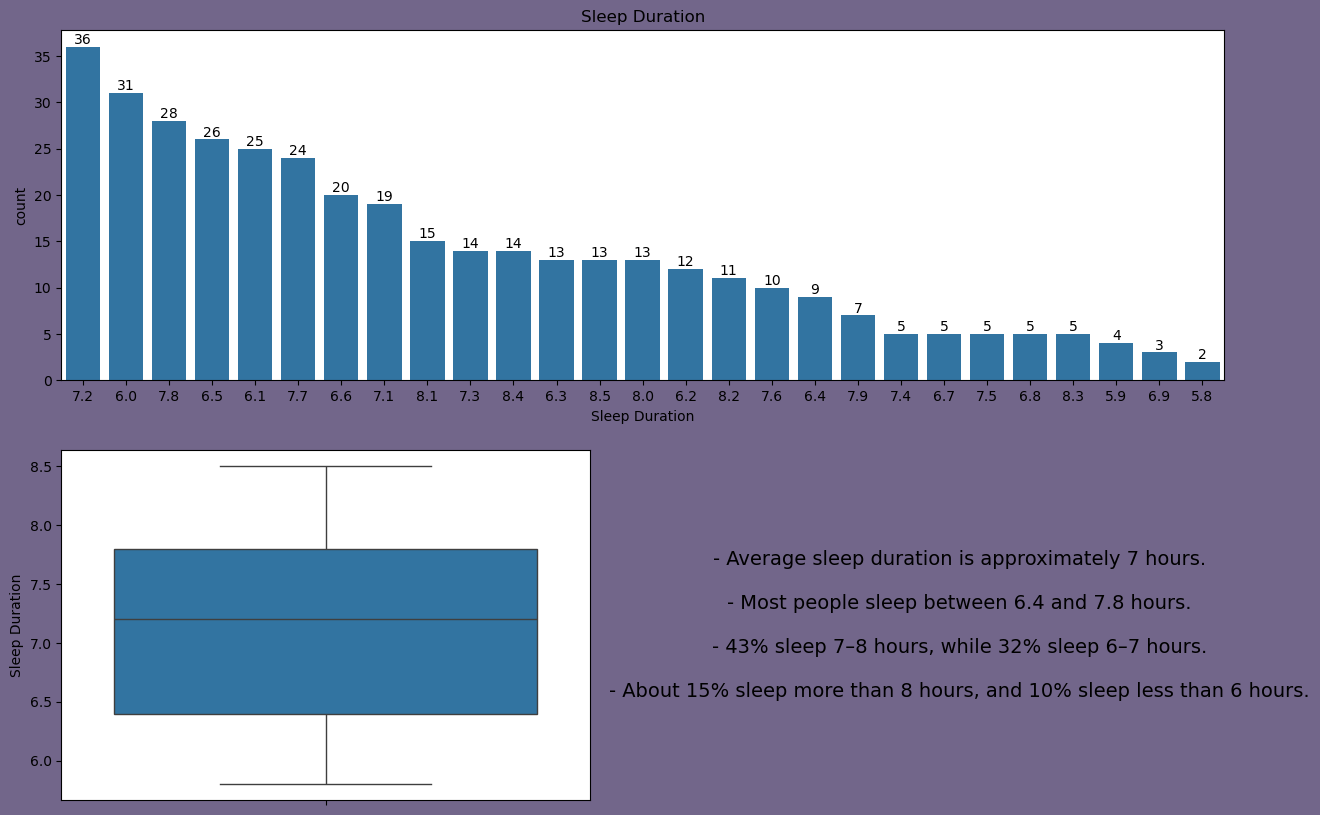

In [47]:
# graphically 
fig = plt.figure(figsize = (15,10))
fig.patch.set_facecolor("#72668a")

gs = gridspec.GridSpec(2,2 , figure = fig)

ax_0 = fig.add_subplot(gs[0,:])
bx = sns.countplot(x=data["Sleep Duration"] , order=data["Sleep Duration"].value_counts().index, ax = ax_0)
bx.bar_label(bx.containers[0])
bx.set_title("Sleep Duration")

ax_1 = fig.add_subplot(gs[1,0])
sns.boxplot(data["Sleep Duration"] , ax = ax_1)

ax_2 = fig.add_subplot(gs[1,1])
ax_2.axis("off")
Sleep_analysis_text = (
    "- Average sleep duration is approximately 7 hours.\n\n"
    "- Most people sleep between 6.4 and 7.8 hours.\n\n"
    "- 43% sleep 7–8 hours, while 32% sleep 6–7 hours.\n\n"
    "- About 15% sleep more than 8 hours, and 10% sleep less than 6 hours."
)
ax_2.text(0.5,0.5,Sleep_analysis_text ,ha = "center", va = "center" , fontsize = 14)
plt.show()

### Sleep Duration column analysis
- On average, people sleep around 7 hours per day.
- Most sleep durations fall between 6.4 and 7.8 hours.
- The minimum recorded sleep is approximately 5.8 hours, and the maximum is about 8.5 hours.
- 43% of people sleep between 7 to 8 hours, while 32% sleep between 6 to 7 hours.
- Around 15% sleep more than 8 hours, and only 10% sleep less than 6 hours.


#### column :Heart Rate

In [48]:
data["Heart Rate"].describe()

count    374.000000
mean      70.165775
std        4.135676
min       65.000000
25%       68.000000
50%       70.000000
75%       72.000000
max       86.000000
Name: Heart Rate, dtype: float64

In [49]:
print(f"Number of Unique features there in this data are {len(list(data["Heart Rate"].unique()))}")
data["Heart Rate"].unique()

Number of Unique features there in this data are 19


array([77, 75, 85, 82, 70, 80, 78, 69, 72, 68, 76, 81, 65, 84, 74, 67, 73,
       83, 86], dtype=int64)

In [50]:
data["Heart Rate"].value_counts()

Heart Rate
68    94
70    76
72    69
65    67
75    36
78     5
85     3
80     3
84     2
83     2
73     2
67     2
74     2
77     2
81     2
76     2
69     2
86     2
82     1
Name: count, dtype: int64

In [51]:
# check the outliers in the Heart rate 
heartrate_q1 = data["Heart Rate"].quantile(0.25)
heartrate_q3 = data["Heart Rate"].quantile(0.75)
iqr = heartrate_q3 - heartrate_q1
upper_heartrate = heartrate_q3 + (1.5 * iqr)
lower_heartrate = heartrate_q1 - (1.5 * iqr)

# outliers in age column 
heartrate_outliers = data[(data["Heart Rate"] > upper_heartrate) | (data["Heart Rate"] < lower_heartrate) ]
print(f"Lower fence for outliers: {lower_heartrate}")
print(f"Upper fence for outliers: {upper_heartrate}")
print(f"\n Number of Outliers:{len(list(heartrate_outliers))}")

heartrate_outliers

Lower fence for outliers: 62.0
Upper fence for outliers: 78.0

 Number of Outliers:15


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,BP Category
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,Hypertension Stage 2
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,Hypertension Stage 2
5,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia,140,90,Hypertension Stage 2
6,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia,140,90,Hypertension Stage 2
16,Female,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Sleep Apnea,132,87,Hypertension Stage 1
18,Female,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Insomnia,132,87,Hypertension Stage 1
80,Female,34,Scientist,5.8,4,32,8,Overweight,131/86,81,5200,Sleep Apnea,131,86,Hypertension Stage 1
81,Female,34,Scientist,5.8,4,32,8,Overweight,131/86,81,5200,Sleep Apnea,131,86,Hypertension Stage 1
93,Male,35,Lawyer,7.4,7,60,5,Obese,135/88,84,3300,Sleep Apnea,135,88,Hypertension Stage 1
145,Female,38,Lawyer,7.4,7,60,5,Obese,135/88,84,3300,Sleep Apnea,135,88,Hypertension Stage 1


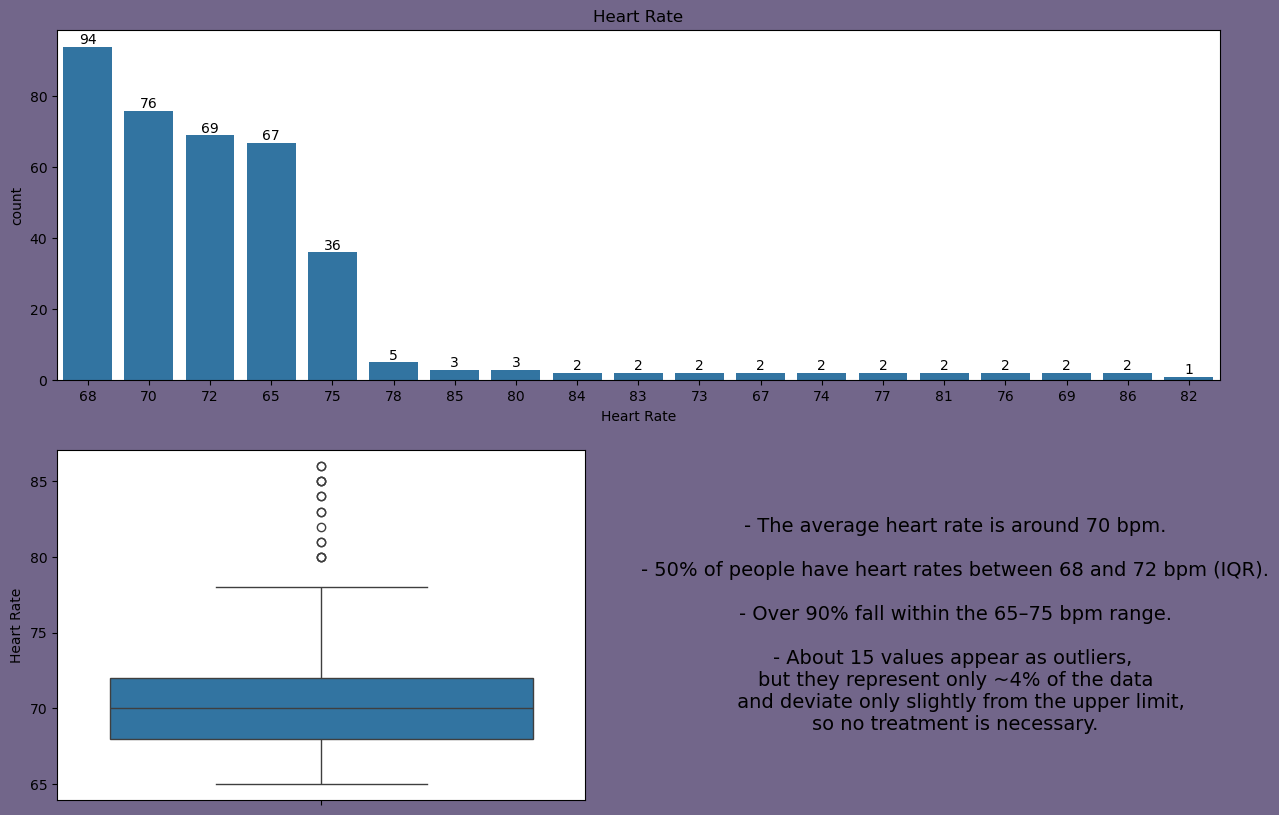

In [52]:
# graphically 
fig = plt.figure(figsize = (15,10))
fig.patch.set_facecolor("#72668a")

gs = gridspec.GridSpec(2,2 , figure = fig)

ax_0 = fig.add_subplot(gs[0,:])
bx = sns.countplot(x=data["Heart Rate"] , order=data["Heart Rate"].value_counts().index, ax = ax_0)
bx.bar_label(bx.containers[0])
bx.set_title("Heart Rate")

ax_1 = fig.add_subplot(gs[1,0])
sns.boxplot(data["Heart Rate"] , ax = ax_1)

ax_2 = fig.add_subplot(gs[1,1])
ax_2.axis("off")
HeartRate_analysis_text = (
    "- The average heart rate is around 70 bpm.\n\n"
    "- 50% of people have heart rates between 68 and 72 bpm (IQR).\n\n"
    "- Over 90% fall within the 65–75 bpm range.\n\n"
    "- About 15 values appear as outliers, \nbut they represent only ~4% of the data\n  and deviate only slightly from the upper limit,\nso no treatment is necessary."
)

ax_2.text(0.5,0.5,HeartRate_analysis_text,ha = "center", va = "center" , fontsize = 14)
plt.show()

### Heart Rate Column Analysis
- Average heart rate is around 70 bpm, with 50% of people between 68–72 bpm (IQR).
- Over 90% fall within a healthy range of 65–75 bpm.
- About 15 outliers are detected, making up only ~4% of the data.
- These outliers slightly exceed the upper limit and show no major deviation.
- No outlier treatment needed as they have minimal impact on the distribution.

---
### Observations - On Numerical columns (Univariate)
---

## Age column analysis

- Around 17% of people fall between the 43 and 44 age group, with about 70% in the 31-50 age category.
- According to the boxplot, 50% of the data lies between 35 and 50 years, representing the interquartile range.
- The average age is 42, and the median is 43, indicating an approximately symmetrical age distribution.
- Both statistical methods and graphical analysis confirm there are no outliers in the Age column.
- Overall, the Age data is clean, well-distributed, and suitable for further analysis.

## Quality of Sleep column analysis
- It ranges between 4 ( low quality of sleep) to 9 ( high quality of sleep).
- Around 48% of people had Excellent quality sleep (score 8 or 9).
- Around 49% had average Good quality sleep (score 6 or 7).
- Only about 3% had poor sleep quality (score 4 or 5).
- On an Average the sleep of quality of people is at score 7.
- 50% of data lies in the range between 6-8 quality of sleep.
  
## Stress Level column analysis
- It ranges between 3 ( low stress level) to 8( high stress level).
- On an Average the stress level for people is at score 5.
- 50% of data lies in the range between 5-7 stress level.
- Around 38% of people are having low level of stress (score 3 or 4).
- Around 32% people are suffering with high stress level (score 7 or 8).
- Rest 30% of people are at reasonable stress level(score 5 or 6)

## Daily Steps column analysis
- On average, people walk about 6800 steps daily.
- The middle 50% of people walk between 5600 and 8000 steps daily (IQR range).
- The most common step count is 8000 steps per day, with around 27% of people.
- Following that, 7000, 6000, and 5000 steps are also common, each representing roughly 18% (54% combined).
- Smaller groups walk 10000 steps (about 10%) 

## Physical activity column analysis
- Half of the individuals engage in physical activity for 45 to 75 minutes per day (IQR).
- The average activity duration is approximately 59 minutes.
- Interestingly, about 18% of people consistently exercise at standard intervals such as 30, 45, 60, 75, and 90 minutes.

## Sleep Duration column analysis
- On average, people sleep around 7 hours per day.
- Most sleep durations fall between 6.4 and 7.8 hours.
- The minimum recorded sleep is approximately 5.8 hours, and the maximum is about 8.5 hours.
- 43% of people sleep between 7 to 8 hours, while 32% sleep between 6 to 7 hours.
- Around 15% sleep more than 8 hours, and only 10% sleep less than 6 hours.

## Heart Rate column analysis
- Heart Rate Column Analysis
- Average heart rate is around 70 bpm, with 50% of people between 68–72 bpm (IQR).
- Over 90% fall within a healthy range of 65–75 bpm.
- About 15 outliers are detected, making up only ~4% of the data.
- These outliers slightly exceed the upper limit and show no major deviation.
- No outlier treatment needed as they have minimal impact on the distribution.

In [53]:
data.head()             # New columns are created [Systolic,Diastolic,BP Category] these should be dropped later.

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,BP Category
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder,126,83,Hypertension Stage 1
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,125,80,Hypertension Stage 1
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,125,80,Hypertension Stage 1
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,Hypertension Stage 2
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,Hypertension Stage 2


---
## Bi-Variate analysis on Categorical and Numerical columns.
---

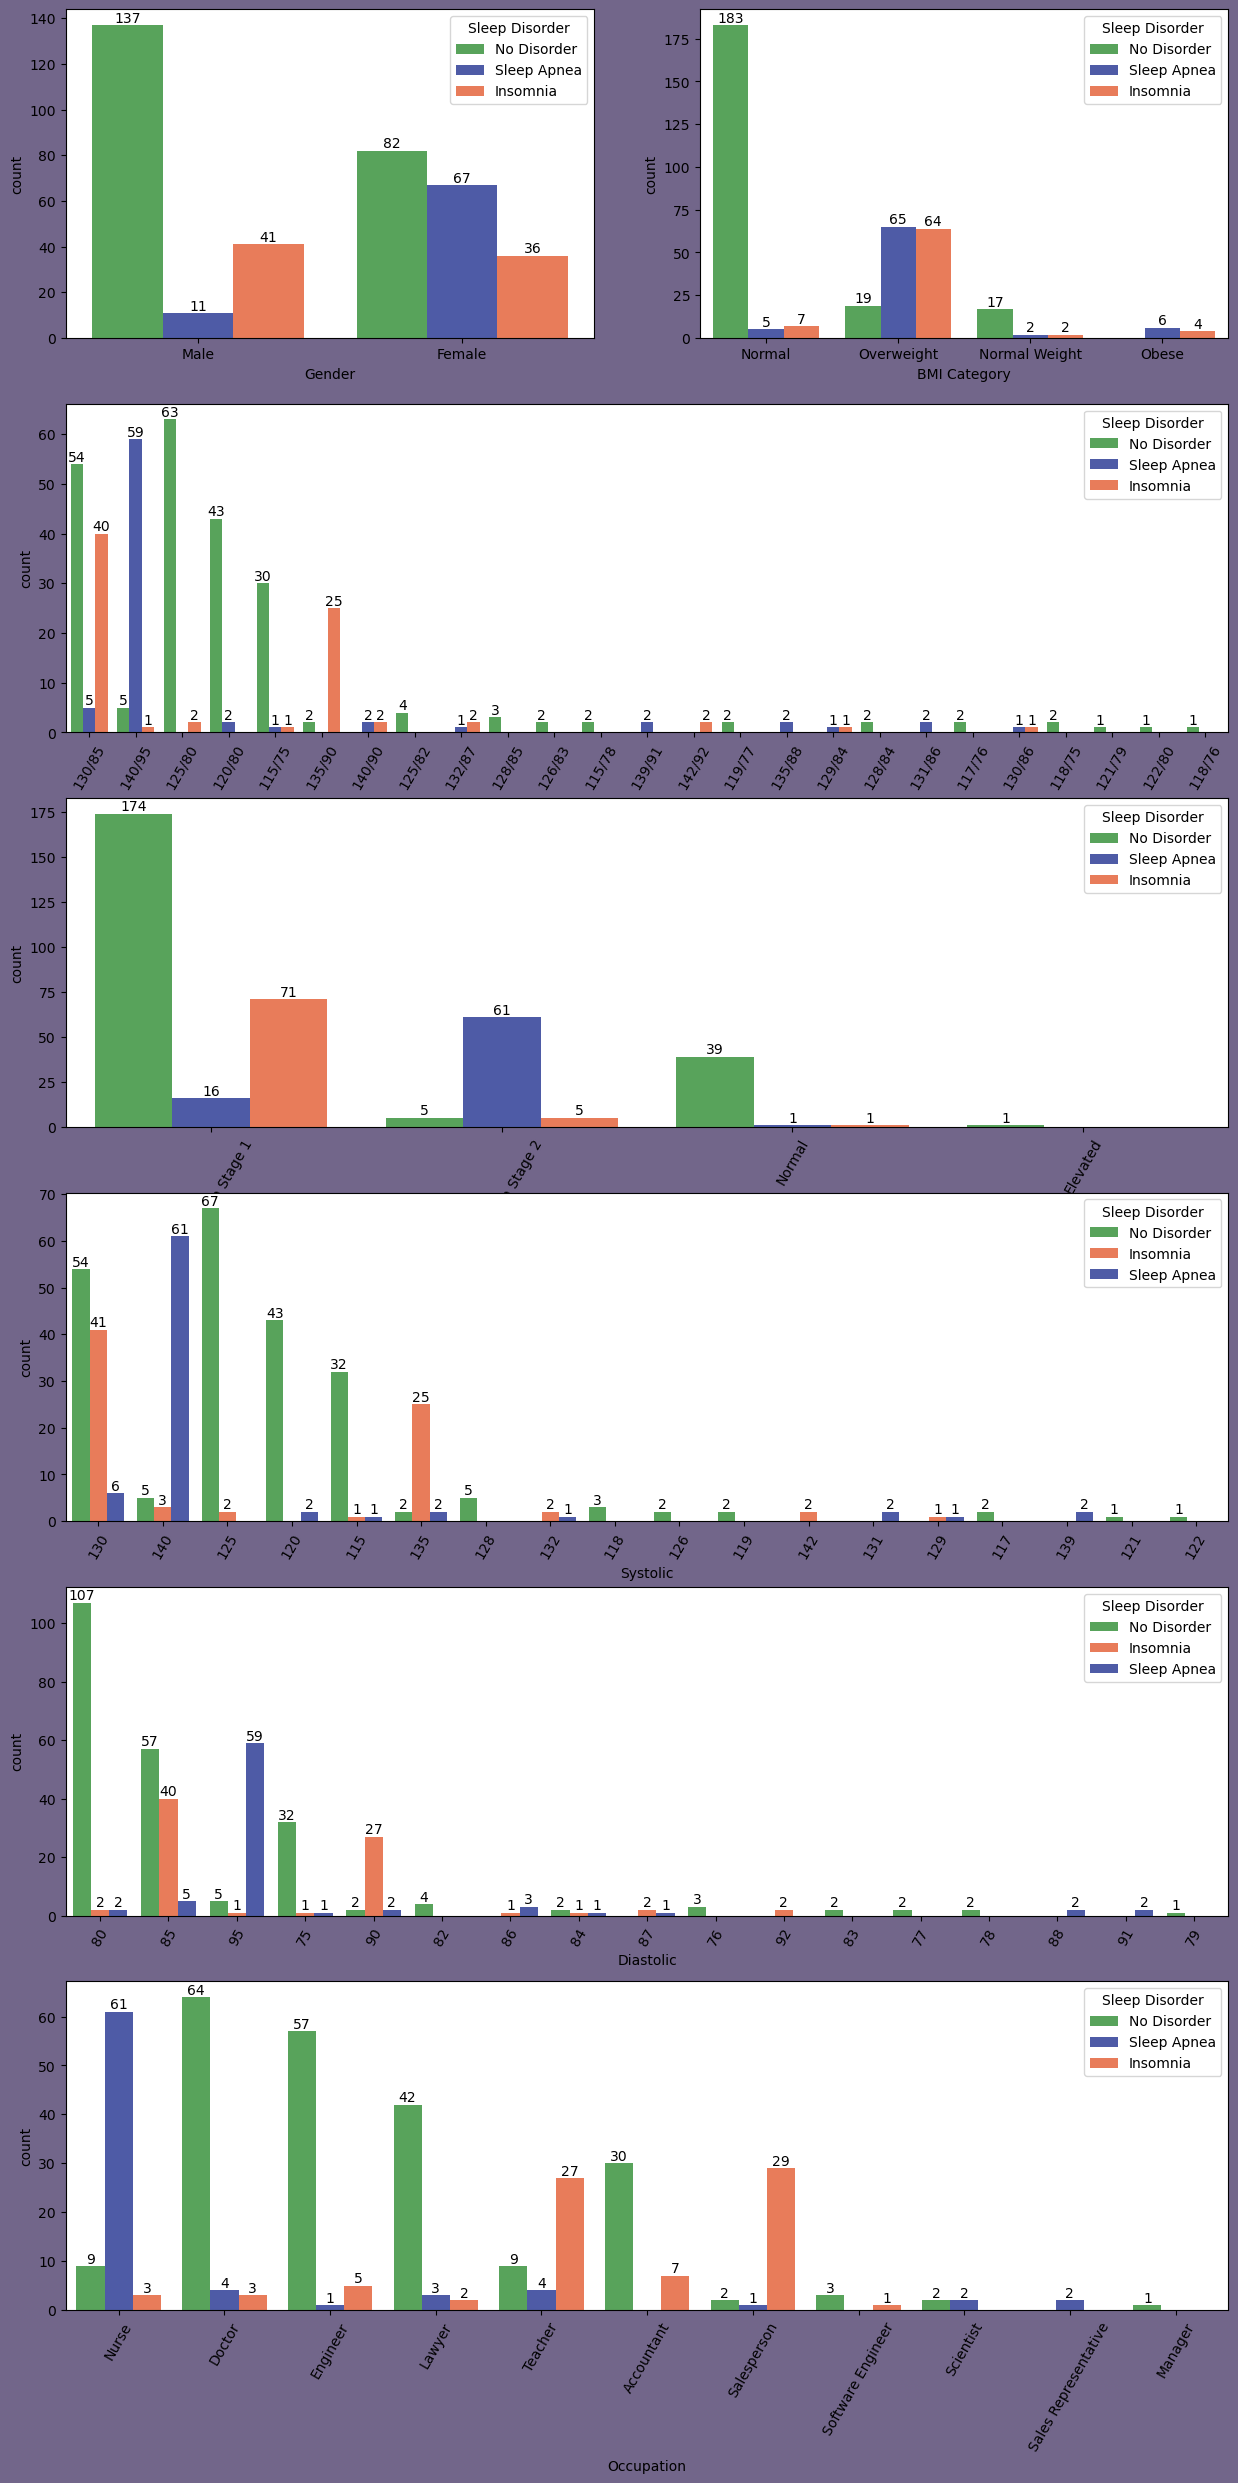

In [54]:
# lets analyse the categorical columns with target column as hue

fig = plt.figure(figsize = (15,35))
fig.patch.set_facecolor("#72668a")

gs = gridspec.GridSpec(7,2,figure=fig )
custom_palette = {
    'No Disorder': '#4CAF50',      
    'Insomnia': '#FF7043',         
    'Sleep Apnea': '#3F51B5'       
}

ax_0 = fig.add_subplot(gs[0,0])
bx= sns.countplot(data= data,x="Gender" ,ax = ax_0,order = data["Gender"].value_counts().index,hue="Sleep Disorder",palette=custom_palette)
bx.bar_label(bx.containers[0])
bx.bar_label(bx.containers[1])
bx.bar_label(bx.containers[2])
bx.set_xticklabels(bx.get_xticklabels())

ax_1 = fig.add_subplot(gs[0,1])
bx= sns.countplot(data= data,x="BMI Category" ,ax = ax_1 ,order = data["BMI Category"].value_counts().index,hue="Sleep Disorder",palette=custom_palette)
bx.bar_label(bx.containers[0])
bx.bar_label(bx.containers[1])
bx.bar_label(bx.containers[2])
bx.set_xticklabels(bx.get_xticklabels())

ax_2 = fig.add_subplot(gs[1,:])
bx= sns.countplot(data= data,x="Blood Pressure" ,ax = ax_2,order = data["Blood Pressure"].value_counts().index ,hue="Sleep Disorder",palette=custom_palette
)
bx.bar_label(bx.containers[0])
bx.bar_label(bx.containers[1])
bx.bar_label(bx.containers[2])
bx.set_xticklabels(bx.get_xticklabels(),rotation =60)

ax_3 = fig.add_subplot(gs[2,:])
bx= sns.countplot(data= data,x="BP Category" ,ax = ax_3,order = data["BP Category"].value_counts().index  ,hue="Sleep Disorder",palette=custom_palette )
bx.bar_label(bx.containers[0])
bx.bar_label(bx.containers[1])
bx.bar_label(bx.containers[2])
bx.set_xticklabels(bx.get_xticklabels(),rotation =60)

ax_4 = fig.add_subplot(gs[3,:])
bx= sns.countplot(data= data,x="Systolic" ,ax = ax_4,order = data["Systolic"].value_counts().index  ,hue="Sleep Disorder",palette=custom_palette )
bx.bar_label(bx.containers[0])
bx.bar_label(bx.containers[1])
bx.bar_label(bx.containers[2])
bx.set_xticklabels(bx.get_xticklabels(),rotation =60)

ax_5 = fig.add_subplot(gs[4,:])
bx= sns.countplot(data= data,x="Diastolic" ,ax = ax_5,order = data["Diastolic"].value_counts().index  ,hue="Sleep Disorder",palette=custom_palette)
bx.bar_label(bx.containers[0])
bx.bar_label(bx.containers[1])
bx.bar_label(bx.containers[2])
bx.set_xticklabels(bx.get_xticklabels(),rotation =60)


ax_6 = fig.add_subplot(gs[5,:])
bx= sns.countplot(data= data,x="Occupation" ,ax = ax_6,order = data["Occupation"].value_counts().index  ,hue="Sleep Disorder",palette=custom_palette)
bx.bar_label(bx.containers[0])
bx.bar_label(bx.containers[1])
bx.bar_label(bx.containers[2])
bx.set_xticklabels(bx.get_xticklabels(),rotation =60)


plt.show()

In [55]:
data.head(4)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,BP Category
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder,126,83,Hypertension Stage 1
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,125,80,Hypertension Stage 1
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,125,80,Hypertension Stage 1
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,Hypertension Stage 2


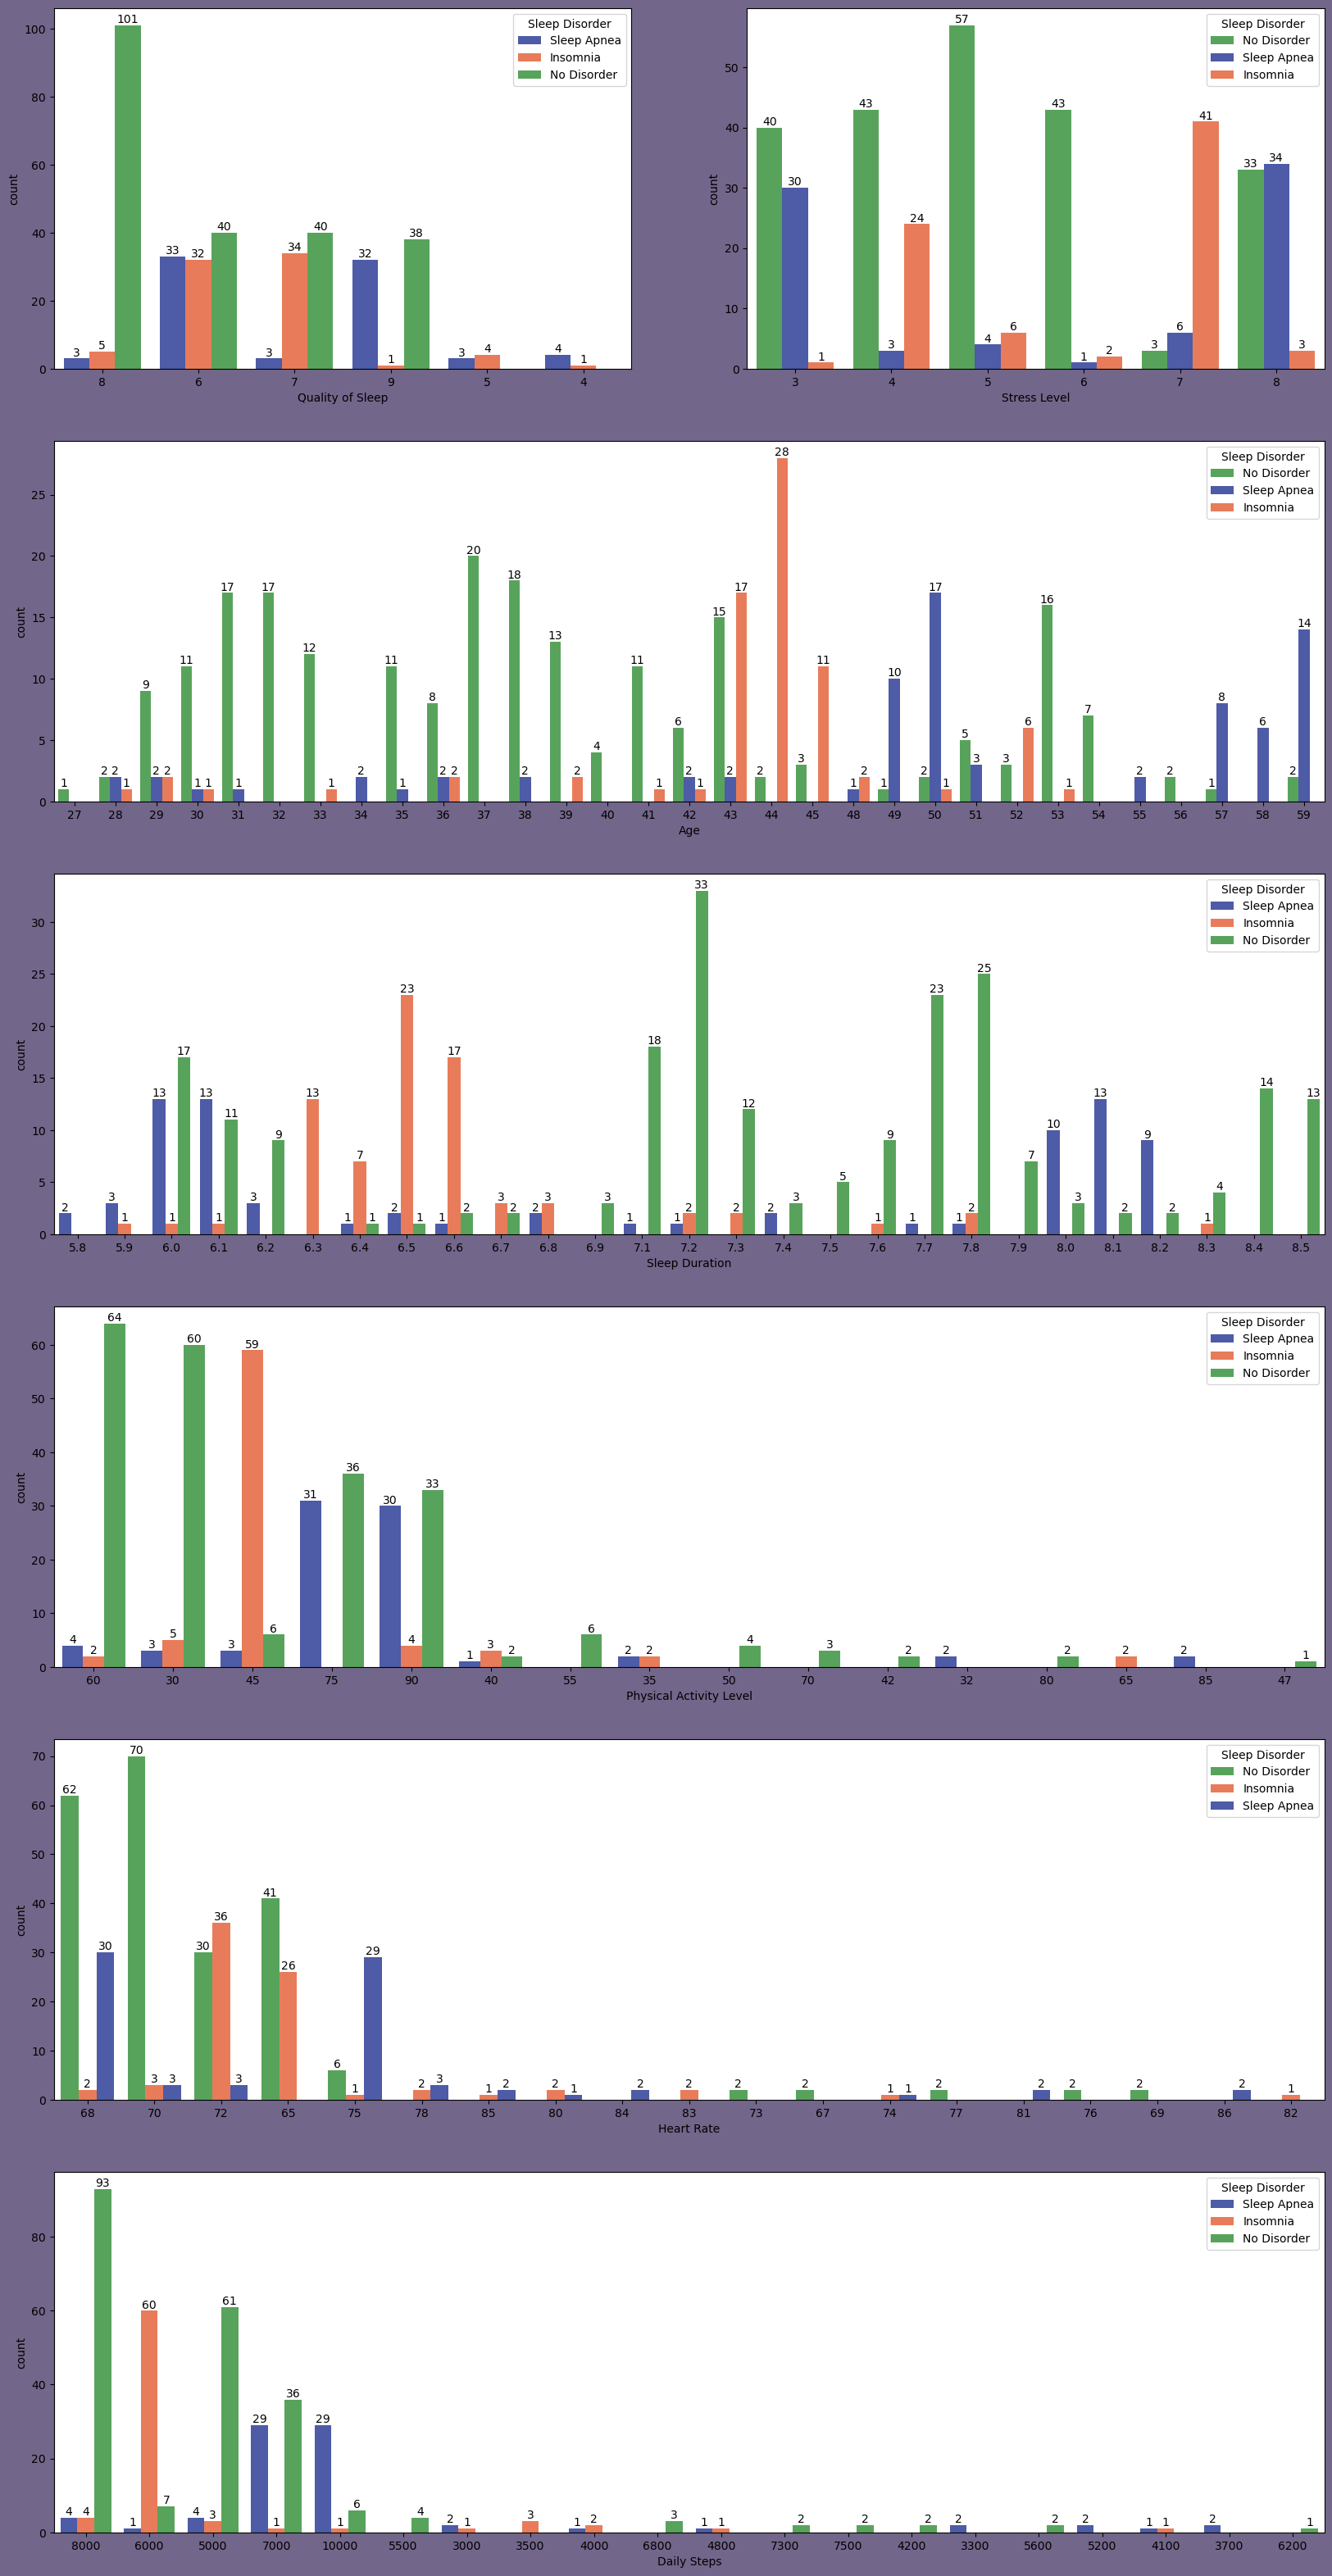

In [56]:
# lets analyse the Numerical columns with target column as hue

fig = plt.figure(figsize = (20,40))
fig.patch.set_facecolor("#72668a")

gs = gridspec.GridSpec(6,2,figure=fig )

custom_palette = {
    'No Disorder': '#4CAF50',      
    'Insomnia': '#FF7043',         
    'Sleep Apnea': '#3F51B5'       
}

ax_0 = fig.add_subplot(gs[0,0])
bx= sns.countplot(data= data,x="Quality of Sleep" ,ax = ax_0 ,order = data["Quality of Sleep"].value_counts().index,hue="Sleep Disorder",palette=custom_palette )
bx.bar_label(bx.containers[0])
bx.bar_label(bx.containers[1])
bx.bar_label(bx.containers[2])
bx.set_xticklabels(bx.get_xticklabels())

ax_1 = fig.add_subplot(gs[0,1])
bx= sns.countplot(data= data,x="Stress Level" ,ax = ax_1 ,hue="Sleep Disorder",palette=custom_palette )
bx.bar_label(bx.containers[0])
bx.bar_label(bx.containers[1])
bx.bar_label(bx.containers[2])
bx.set_xticklabels(bx.get_xticklabels())

ax_2 = fig.add_subplot(gs[1,:])
bx= sns.countplot(data= data,x="Age" ,ax = ax_2 ,hue="Sleep Disorder",palette=custom_palette )
bx.bar_label(bx.containers[0])
bx.bar_label(bx.containers[1])
bx.bar_label(bx.containers[2])
bx.set_xticklabels(bx.get_xticklabels())

ax_3 = fig.add_subplot(gs[2,:])
bx= sns.countplot(data= data,x="Sleep Duration" ,ax = ax_3,hue="Sleep Disorder",palette=custom_palette )
bx.bar_label(bx.containers[0])
bx.bar_label(bx.containers[1])
bx.bar_label(bx.containers[2])
bx.set_xticklabels(bx.get_xticklabels())

ax_4 = fig.add_subplot(gs[3,:])
bx= sns.countplot(data= data,x="Physical Activity Level" ,ax = ax_4,order = data["Physical Activity Level"].value_counts().index  ,hue="Sleep Disorder" ,palette=custom_palette)
bx.bar_label(bx.containers[0])
bx.bar_label(bx.containers[1])
bx.bar_label(bx.containers[2])
bx.set_xticklabels(bx.get_xticklabels())

ax_5 = fig.add_subplot(gs[4,:])
bx= sns.countplot(data= data,x="Heart Rate" ,ax = ax_5,order = data["Heart Rate"].value_counts().index  ,hue="Sleep Disorder",palette=custom_palette )
bx.bar_label(bx.containers[0])
bx.bar_label(bx.containers[1])
bx.bar_label(bx.containers[2])
bx.set_xticklabels(bx.get_xticklabels())

ax_6 = fig.add_subplot(gs[5,:])
bx= sns.countplot(data= data,x="Daily Steps" ,ax = ax_6,order = data["Daily Steps"].value_counts().index  ,hue="Sleep Disorder",palette=custom_palette )
bx.bar_label(bx.containers[0])
bx.bar_label(bx.containers[1])
bx.bar_label(bx.containers[2])
bx.set_xticklabels(bx.get_xticklabels())

plt.show()

### Observations - On Numerical columns & Categorical columns (Bi-variate)

---
## Gender Analysis
##### For males (n = 189):
- 27% (52 individuals) were affected by sleep disorders.5% (11 individuals) had sleep apnea.22% (41 individuals) were diagnosed insomnia.

##### For females (n = 185):
- 56% (103 individuals) were affected by sleep disorders.36% (67 individuals) had sleep apnea.19% (36 individuals) were diagnosed insomnia.

##### Insight:
- Sleep disorders are more prevalent among females in this dataset.
- Sleep apnea is significantly higher in females (36%) compared to males (5%).
- Insomnia rates are somewhat similar between genders (22% in males vs. 19% in females).
- Gender column had an significant impact on Sleep disorder.
---
## BMI Category Analysis
##### Obese (n = 10):
- 100% had sleep disorders  
- 60% sleep apnea | 40% insomnia

##### Overweight (n = 148):
- 87% had sleep disorders  
- 44% sleep apnea | 43% insomnia

##### Normal BMI (n = 193):
- 6% had sleep disorders  
- Very low incidence of sleep issues

##### Normal Weight:
- 19% had sleep disorders  
- Significantly lower than overweight/obese groups
##### Insight:

- The chance of sleep disorders increases with higher BMI.
- All obese individuals had sleep problems, showing a strong link.
- Overweight people also had high rates of both sleep apnea and insomnia.
- People with normal BMI or weight had far fewer sleep issues.
- Keeping a healthy BMI may help prevent sleep disorders.
- Yes BMI had an significant impact on sleep disorder.
---
## Occupation Analysis

- 78% of all sleep apnea cases are from the nursing profession.
- Salespersons (38%) and teachers (35%) account for the majority of insomnia cases.
- Doctors, engineers, lawyers, and accountants show minimal sleep disorders (~7% out of 324 people).
- Managers show little to no signs of sleep disorders.
- we can see there is relation between occupation and sleep disorder.
---
## Blood Pressure Analysis

- 92% of insomnia cases are linked to Hypertension Stage 1.
- 78% of sleep apnea cases are linked to Hypertension Stage 2.
- Normal/Elevated BP shows minimal link to sleep disorders (only 2 cases out of 42).
- Insomnia is most common at BP levels around 130/85–140/95.
- Sleep apnea is most common at BP ≥140/90.
- Sleep disorders are strongly associated with:
  - Systolic BP ≥130
  - Diastolic BP ≥85
##### Insight:
- Insomnia is strongly linked to Hypertension Stage 1, while sleep apnea is linked to Stage 2.
- Sleep disorders are rare in individuals with Normal or Elevated BP.
- Risk increases significantly when systolic ≥130 or diastolic ≥85.
- There is an impact on sleep disorder because BP but not as serious impact i would feel.
---
## Age column analysis
- 22%, 36%, and 14% of insomnia cases occurred at ages 43, 44, and 45 respectively.
  - 72% of all insomnia cases fall within the 43–45 age group.
- 13% and 22% of sleep apnea cases were found at ages 49 and 50.
- 10%, 8%, and 18% of sleep apnea cases were found at ages 57, 58, and 59.
  - 71% of all sleep apnea cases fall within the 49–50 and 57–59 age groups.
##### Insight: 
- Insomnia is strongly associated with the early 40s (ages 43–45).
- Sleep apnea is more prevalent in late 40s to late 50s (ages 49–50 & 57–59).
- As people age, changes in their body or lifestyle may lead to sleep disorders.so Age has an impact on sleep disorders.
---
## Quality of Sleep column analysis (QOS)
- When QOS is between 4 and 5, it shows a definite sleep disorder with a 100% disorder rate, even though the count is very low: 3 or 4 cases out of 78 for sleep apnea and 4 or 1 case out of 77 for insomnia.
- When the QOS is exactly 8, it shows 27% no disorder, with 3 sleep apnea cases and 5 insomnia cases.
- When the QOS is at 9, it shows 10% no disorder, with 32 cases of sleep apnea.
- When the QOS is between 6 and 7, it shows 80 cases of no disorder (10.6% each), 32 and 34 cases of insomnia, and 33 and 3 cases of sleep apnea respectively.
##### Insight:
- People with very low sleep quality often have sleep disorders, but even those who sleep well can still have issues like sleep apnea.
- So, sleep quality gives some clues, but it doesn’t always show if someone has a disorder.
- Sleep quality affects sleep disorder risk, but it's not a clear or reliable indicator.
---
## Stress Level column analysis
- - At low stress levels, sleep apnea is highest at level 3 with 38% of all sleep apnea cases, and insomnia is highest at level 4 with 31% of all insomnia cases.
- At high stress levels, insomnia is highest at level 7 with 53% of all insomnia cases, and sleep apnea is highest at level 8 with 43.5% of all sleep apnea cases
- When stress increases from level 7 to 8, insomnia is highest at level 7, but sleep apnea goes up at level 8.
- When stress decreases from level 4 to 3, insomnia is highest at level 4, but sleep apnea goes up at level 3.
##### Insight:
- This pattern suggests that different stress levels may trigger different types of sleep disorders.stress levels clearly have a significant impact on sleep disorders
---
## Daily Steps column analysis
- Insomnia is more common in people walking around 6000 steps/day.
- Sleep apnea is more frequent in those walking 7000–10000 steps/day.
- People walking exactly 5000 or 8000 steps/day had the lowest sleep disorder rates.
- Among 8000-step walkers, only 8 out of 101 had any disorder (~8%).
- Less than 8000 steps (6k–7k) showed 78% insomnia and 37% sleep apnea.
- Even at 10,000 steps, 38% experienced sleep apnea.
##### Insight:
- Daily steps show no clear protective trend against sleep disorders.
---
## Physical activity column analysis
- Only 6 disorder cases out of 374 were seen at 60 min/day — minimal risk zone.
- 77% of total insomnia cases (59/77) occurred in those doing 45 min/day activity.
- 40% and 38% of sleep apnea cases were seen in those with 75 and 95 min/day activity respectively.
- People below average activity (≤45 min) show significantly higher insomnia risk.
- People above average activity (≥75 min) show strong association with sleep apnea.
##### Insight:
- Insomnia is strongly linked to low physical activity (especially around 45 min/day).
- Sleep apnea is more common in those doing excessive physical activity (75+ min/day).
- Optimal sleep health is seen in individuals doing ~60 min/day — a balance zone.
- Both under- and over-exercising appear to increase sleep disorder risks.
---
## Sleep Duration column analysis
- Average sleep duration is 7 hours/day, with 36% (135/374) of people having no disorders when sleeping between 7.1 to 7.9 hours.
- Below average sleep (6.3 to 6.8 hours) accounts for 86% of insomnia cases, with peaks at:
  - 6.5 hours: 23/77 cases
  - 6.6 hours: 17/77 cases
  - 6.3 hours: 13/77 cases
- Sleep apnea cases cluster around:
  - 6.0 and 6.1 hours (13/78 cases each)
  - 8.0, 8.1, and 8.2 hours combined (32/78 cases)
##### Insight:
- Both shorter and longer than average sleep durations increase the risk of sleep disorders.
- Sleeping around 7–8 hours is linked to the lowest disorder rates.
- Even small deviations from average sleep can impact sleep quality.
---
## Heart Rate column analysis
- People with 68 heart rate had seen 38% of sleep apnea disorder, and with 75 heart rate it is 37%.
- And people with 72 and 65 heart rate had seen 47% and 38% of Insomnia.
- At the same time, people with heart rate between 65 to 72 had almost 54% of No Disorder people.
##### Insight:
- Although some heart rates show higher disorder percentages, there's no consistent pattern.  
Heart rate does not appear to have a clear impact on sleep disorders.
---

---
## Multi Variate analysis on Categorical and Numerical columns.
---

In [57]:
## we have to drop the columns Systolic	,Diastolic,BP Category which we have created for analyses
data.drop(columns=["Systolic","Diastolic","BP Category"],inplace = True)

In [58]:
# lets see the relation between the cats cols except the sleep disorder
req_cats_cols = []
for col in cats_cols:
    if col != 'Sleep Disorder':
        req_cats_cols.append(col)

results = []

for i in req_cats_cols:
    for j in req_cats_cols:
        if i != j:
            table = pd.crosstab(data[i],data[j])
            chi2,p,dof,_ = chi2_contingency(table)
            results.append({"column_1":i,
                            "column_2":j,
                            "chi2":round(chi2,4),
                            "pvalue":round(p,4),
                            "dof":dof})
results_df = pd.DataFrame(results)
print(results_df)

          column_1        column_2       chi2  pvalue  dof
0           Gender      Occupation   274.1783     0.0   10
1           Gender    BMI Category    59.3935     0.0    3
2           Gender  Blood Pressure   263.0108     0.0   24
3       Occupation          Gender   274.1783     0.0   10
4       Occupation    BMI Category   405.5091     0.0   30
5       Occupation  Blood Pressure  1941.1050     0.0  240
6     BMI Category          Gender    59.3935     0.0    3
7     BMI Category      Occupation   405.5091     0.0   30
8     BMI Category  Blood Pressure   885.1853     0.0   72
9   Blood Pressure          Gender   263.0108     0.0   24
10  Blood Pressure      Occupation  1941.1050     0.0  240
11  Blood Pressure    BMI Category   885.1853     0.0   72


### Observations

- All categorical pairs show significant associations (p ≈ 0).
- Occupation & Blood Pressure have the strongest association (Chi2 = 1941.11).
- BMI Category & Blood Pressure and Occupation & BMI Category also show strong links.
- Gender is significantly associated with all but with weaker chi-square values.
- Associations are symmetric and consistent across pairs.
##### insights
- Occupation and Blood Pressure are the most strongly related features.
- BMI Category is moderately associated with both.
- Gender has the weakest but still meaningful connections.
- These dependencies are important to consider in analysis and modeling.

In [59]:
# lets understand Occupation , BMI with sleep disorder 
Bmi_occupation_sd = pd.crosstab(
    [data["Occupation"], data["BMI Category"]],
    data["Sleep Disorder"]
)
Bmi_occupation_sd.head()                                           # remove head and see full table

Sleep Disorder            Insomnia  No Disorder  Sleep Apnea
Occupation BMI Category                                     
Accountant Normal                1           25            0
           Normal Weight         0            5            0
           Overweight            6            0            0
Doctor     Normal                1           62            2
           Normal Weight         0            2            0

- Most sleep apnea cases (77%) are obese nurses, probably because of night shifts, and for insomnia, 38% are overweight salespersons and 34% are overweight teachers — showing being overweight or obese really ups the chance of sleep problems.

In [60]:
# lets understand Blood Pressure,BMI Category with sleep disorder 
Bp_Bmi_sleep = pd.crosstab([data["Blood Pressure"],data["BMI Category"]],data["Sleep Disorder"])
Bp_Bmi_sleep.head()                                           # remove head and see full table

,Sleep Disorder,Insomnia,No Disorder,Sleep Apnea
Blood Pressure,BMI Category,,,
115/75,Normal,1,30,1
115/78,Normal Weight,0,2,0
117/76,Normal Weight,0,2,0
118/75,Normal Weight,0,2,0
118/76,Normal Weight,0,1,0


- Overweight people with BP around 140/95 made up 76% of sleep apnea cases, while those with BP at 135/90 and 130/85 accounted for 32% and 47% of insomnia cases.


In [61]:
# lets understand Occupation,Blood Pressurewith sleep disorder 
occ_bp_sleep = pd.crosstab([data["Occupation"],data["Blood Pressure"]],data["Sleep Disorder"])
occ_bp_sleep.head()                                                      # remove head and see full table

Sleep Disorder             Insomnia  No Disorder  Sleep Apnea
Occupation Blood Pressure                                    
Accountant 115/75                 1           25            0
           115/78                 0            2            0
           118/76                 0            1            0
           119/77                 0            2            0
           130/85                 6            0            0

- Teachers with 135/90 BP showed 32% of insomnia cases, salespersons with 130/85 BP had 38% insomnia, and nurses with 140/95 BP accounted for 76% of sleep apnea cases.


In [62]:
# lets understand Stress Level , Quality of Sleep with sleep disorder 
stress_QOS_sleep = pd.crosstab([data["Stress Level"],data["Quality of Sleep"]],data["Sleep Disorder"])
# let me check any relation between these two columns 
print(f"The correlation with stress and quality sleep is {round(data["Stress Level"].corr(data["Quality of Sleep"],method= "spearman"),4)} which is showing strong negative corelation.")


stress_QOS_sleep.head()                                                     # remove head and see full table

The correlation with stress and quality sleep is -0.9081 which is showing strong negative corelation.


Sleep Disorder                 Insomnia  No Disorder  Sleep Apnea
Stress Level Quality of Sleep                                    
3            8                        0            2            0
             9                        1           38           30
4            7                       23            2            0
             8                        1           41            1
             9                        0            0            2

- Good sleep quality + low stress doesn't guarantee no disorder.


## Observations - On Numerical columns & Categorical columns (Multi-variate)

---
## Occupation-BMI-Sleep disorder 
- Out of all sleep apnea cases, 77% are nurses who are obese. This may be because nurses often work night shifts, which can increase the risk of sleep apnea.
- Out of all insomnia cases, 38% are salespersons who are overweight. Even though they usually walk a lot, being overweight seems to raise their chances of insomnia.
- Similarly, 34% of insomnia cases are overweight teachers, showing that being overweight is linked to insomnia regardless of job type.
- Overall, people who are overweight or obese have a much higher chance of sleep disorders — 87% of overweight and 100% of obese individuals had sleep problems in this data.
---
## Blood Pressure-BMI-Sleep disorder
- People who are overweight with blood pressure around 140/95 accounted for 76% of sleep apnea cases.
- Overweight individuals with BP at 135/90 and 130/85 made up 32% and 47% of insomnia cases, respectively.
---
## Blood Pressure-Occupation-Sleep disorder
- Teachers with 135/90 BP accounted for 32% of insomnia cases, while salespersons with 130/85 BP had 38% of insomnia cases.  
- Most nurses with 140/95 BP made up 76% of sleep apnea cases.
---
##### COMMON INSIGHTS
- Being overweight or obese combined with higher blood pressure (especially around 130/85 to 140/95) strongly increases the risk of sleep disorders—particularly sleep apnea in obese nurses (likely due to night shifts) and insomnia in overweight salespersons and teachers.
---
## Stress Level -Quality of Sleep - sleep disorder 
- Even "perfect" combinations like stress = 3 and QoS = 9 → don’t eliminate sleep apnea (38% of apnea cases fall here).
- Apnea is persistent even with good QoS — likely influenced more by BMI, BP, Occupation.
- Insomnia is more sensitive to stress changes than sleep quality.
- The "sweet spots" for no disorder aren’t always the lowest stress or highest QoS — moderate values (e.g., stress = 4–5, QoS = 7–8) seem optimal in real data.(25% of all people with no disorder fall here)
- Good sleep quality + low stress doesn't guarantee no disorder.


###  Checking Which Numerical Columns Are Important for the Target  
#### Using Spearman , pearson correlation method

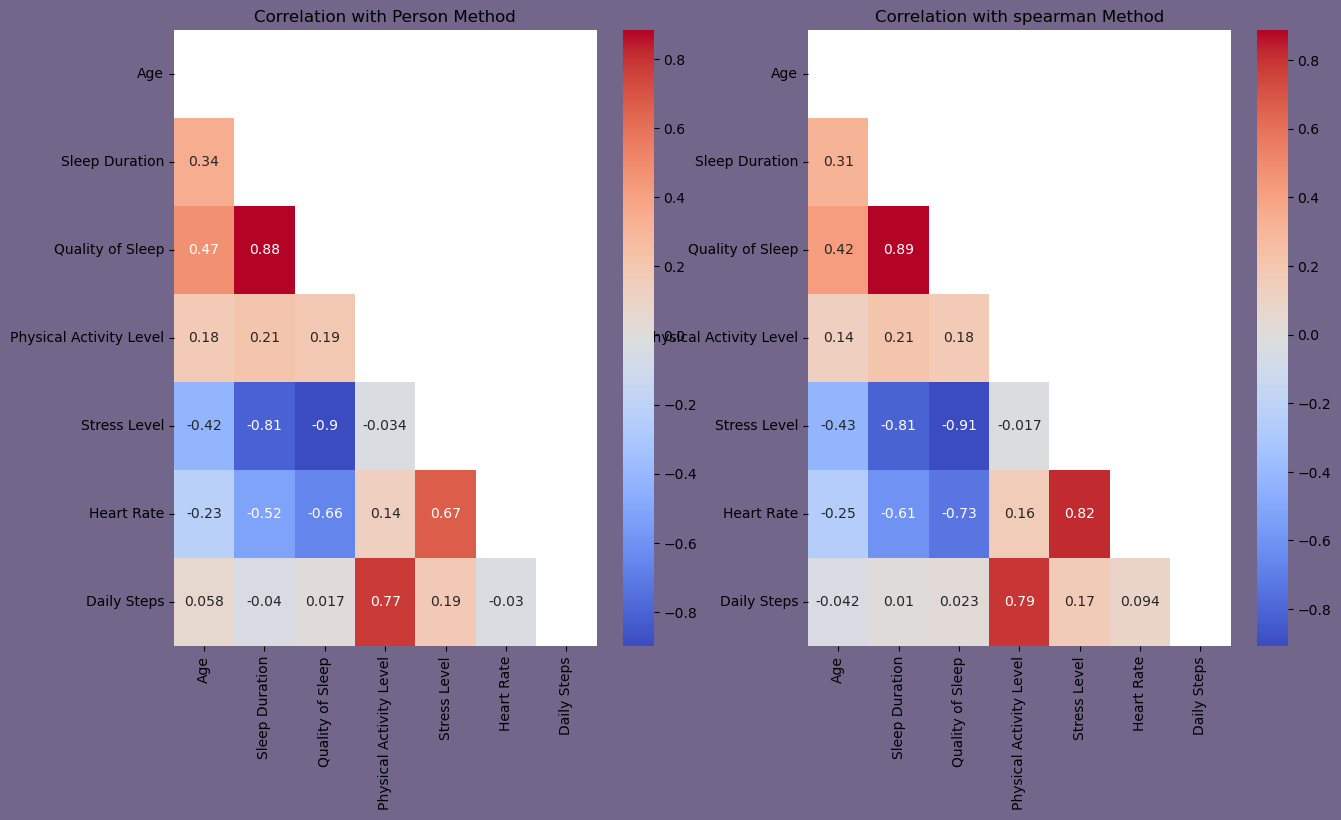

In [63]:
# understand the correlation between the nums cols
fig , axes = plt.subplots(1,2,figsize=(15,8))
axes = axes.flatten()
fig.patch.set_facecolor("#72668a")

nums_cols_df = data.select_dtypes(include = "number")
nums_cols_corr_pearson = nums_cols_df.corr(method = "pearson")
nums_cols_corr_spearman = nums_cols_df.corr(method = "spearman")

mask_1 = np.triu(np.ones_like(nums_cols_corr_pearson, dtype=bool))
mask_2 = np.triu(np.ones_like(nums_cols_corr_spearman,dtype=bool))

sns.heatmap(nums_cols_corr_pearson , annot = True , cmap = "coolwarm" , ax= axes[0],mask = mask_1)
axes[0].set_title("Correlation with Person Method")

sns.heatmap(nums_cols_corr_spearman , annot = True , cmap = "coolwarm" , ax= axes[1],mask=mask_2)
axes[1].set_title("Correlation with spearman Method")

plt.show()

#### Correlation Insights:

- Strong positive correlation between Quality of Sleep and Sleep Duration (r = 0.89).
- Daily Steps and Physical Activity Level also strongly correlated (r = 0.77).
- Heart Rate and Stress Level show moderate-to-strong positive correlation:
    - Pearson: 0.67, Spearman: 0.82 (suggesting a monotonic trend).
- Stress Level has strong negative correlations with:
    - Quality of Sleep (r = -0.90)
    - Sleep Duration (r = -0.81)
- These patterns highlight key relationships affecting sleep and stress, useful for feature selection and modeling.

###  Checking Which Categorical Columns Are Important for the Target  
#### Using Chi-Squared Test, Cramér's V, and Theil’s U

In [64]:
## chi-squared test 
chi2_results = []
for cols in req_cats_cols:
    table = pd.crosstab(data[cols], data["Sleep Disorder"])
    chi2 , p , dof , _ = chi2_contingency(table)
    chi2_results.append({
        'Feature': cols,
        'Chi2': round(chi2, 4),
        'P-value': round(p, 5),
        'DOF': dof
    })
    print(f"{cols} - Chi-Squared value {round(chi2,4)} , P-value {round(p,5)}  , dof {dof}")

Gender - Chi-Squared value 54.306 , P-value 0.0  , dof 2
Occupation - Chi-Squared value 421.3628 , P-value 0.0  , dof 20
BMI Category - Chi-Squared value 246.9682 , P-value 0.0  , dof 6
Blood Pressure - Chi-Squared value 453.1528 , P-value 0.0  , dof 48


In [65]:
## Cramer's V 
def cramer_v(x,y):
    table = pd.crosstab(x,y)
    chi2 , _,_,_ = chi2_contingency(table)
    n = table.sum().sum()
    r , k = table.shape
    return np.sqrt(chi2/(n*(min(r,k)-1)))
cramers_results = []
for cols in req_cats_cols:
    V = cramer_v(data[cols] , data["Sleep Disorder"])
    cramers_results.append({
        'Feature': cols,
        'Cramers_V': round(V, 5)
    })
    print(f"{cols} - Cramer value {round(V,5)}")

Gender - Cramer value 0.38106
Occupation - Cramer value 0.75055
BMI Category - Cramer value 0.57461
Blood Pressure - Cramer value 0.77834


In [66]:
## Theils_U

theils_results = []

for cols in req_cats_cols:
    u = theils_u(data[cols] , data["Sleep Disorder"])
    theils_results.append({
        'Feature': cols,
        'Theils_U': round(u, 5)
    })
    print(f"{cols} - theils value {round(u,5)}")

Gender - theils value 0.11363
Occupation - theils value 0.24461
BMI Category - theils value 0.39367
Blood Pressure - theils value 0.26334


In [67]:
## clear picture 

df_chi2 = pd.DataFrame(chi2_results)
df_cramers = pd.DataFrame(cramers_results)
df_theils = pd.DataFrame(theils_results)
df_merged = df_chi2.merge(df_cramers, on='Feature').merge(df_theils, on='Feature')

print(df_merged)


          Feature      Chi2  P-value  DOF  Cramers_V  Theils_U
0          Gender   54.3060      0.0    2    0.38106   0.11363
1      Occupation  421.3628      0.0   20    0.75055   0.24461
2    BMI Category  246.9682      0.0    6    0.57461   0.39367
3  Blood Pressure  453.1528      0.0   48    0.77834   0.26334


### Observations 
- All features have p-values ≈ 0, confirming significant association with Sleep Disorder.
- Blood Pressure: strongest association with Chi2 = 453.15, Cramér’s V = 0.78.
- Occupation: strong association with Chi2 = 421.36, Cramér’s V = 0.75.
- BMI Category: moderate association with Chi2 = 246.97, Cramér’s V = 0.57.
- Gender: weakest association but still significant with Chi2 = 54.31, Cramér’s V = 0.38.
- Theil’s U suggests BMI (0.39) is the most predictive, followed by Blood Pressure (0.26), Occupation (0.24), and Gender (0.11).
##### Insights:
- Blood Pressure and Occupation are the strongest categorical predictors for Sleep Disorder.
- BMI Category is moderately important.
- Gender is somewhat less important but still relevant.

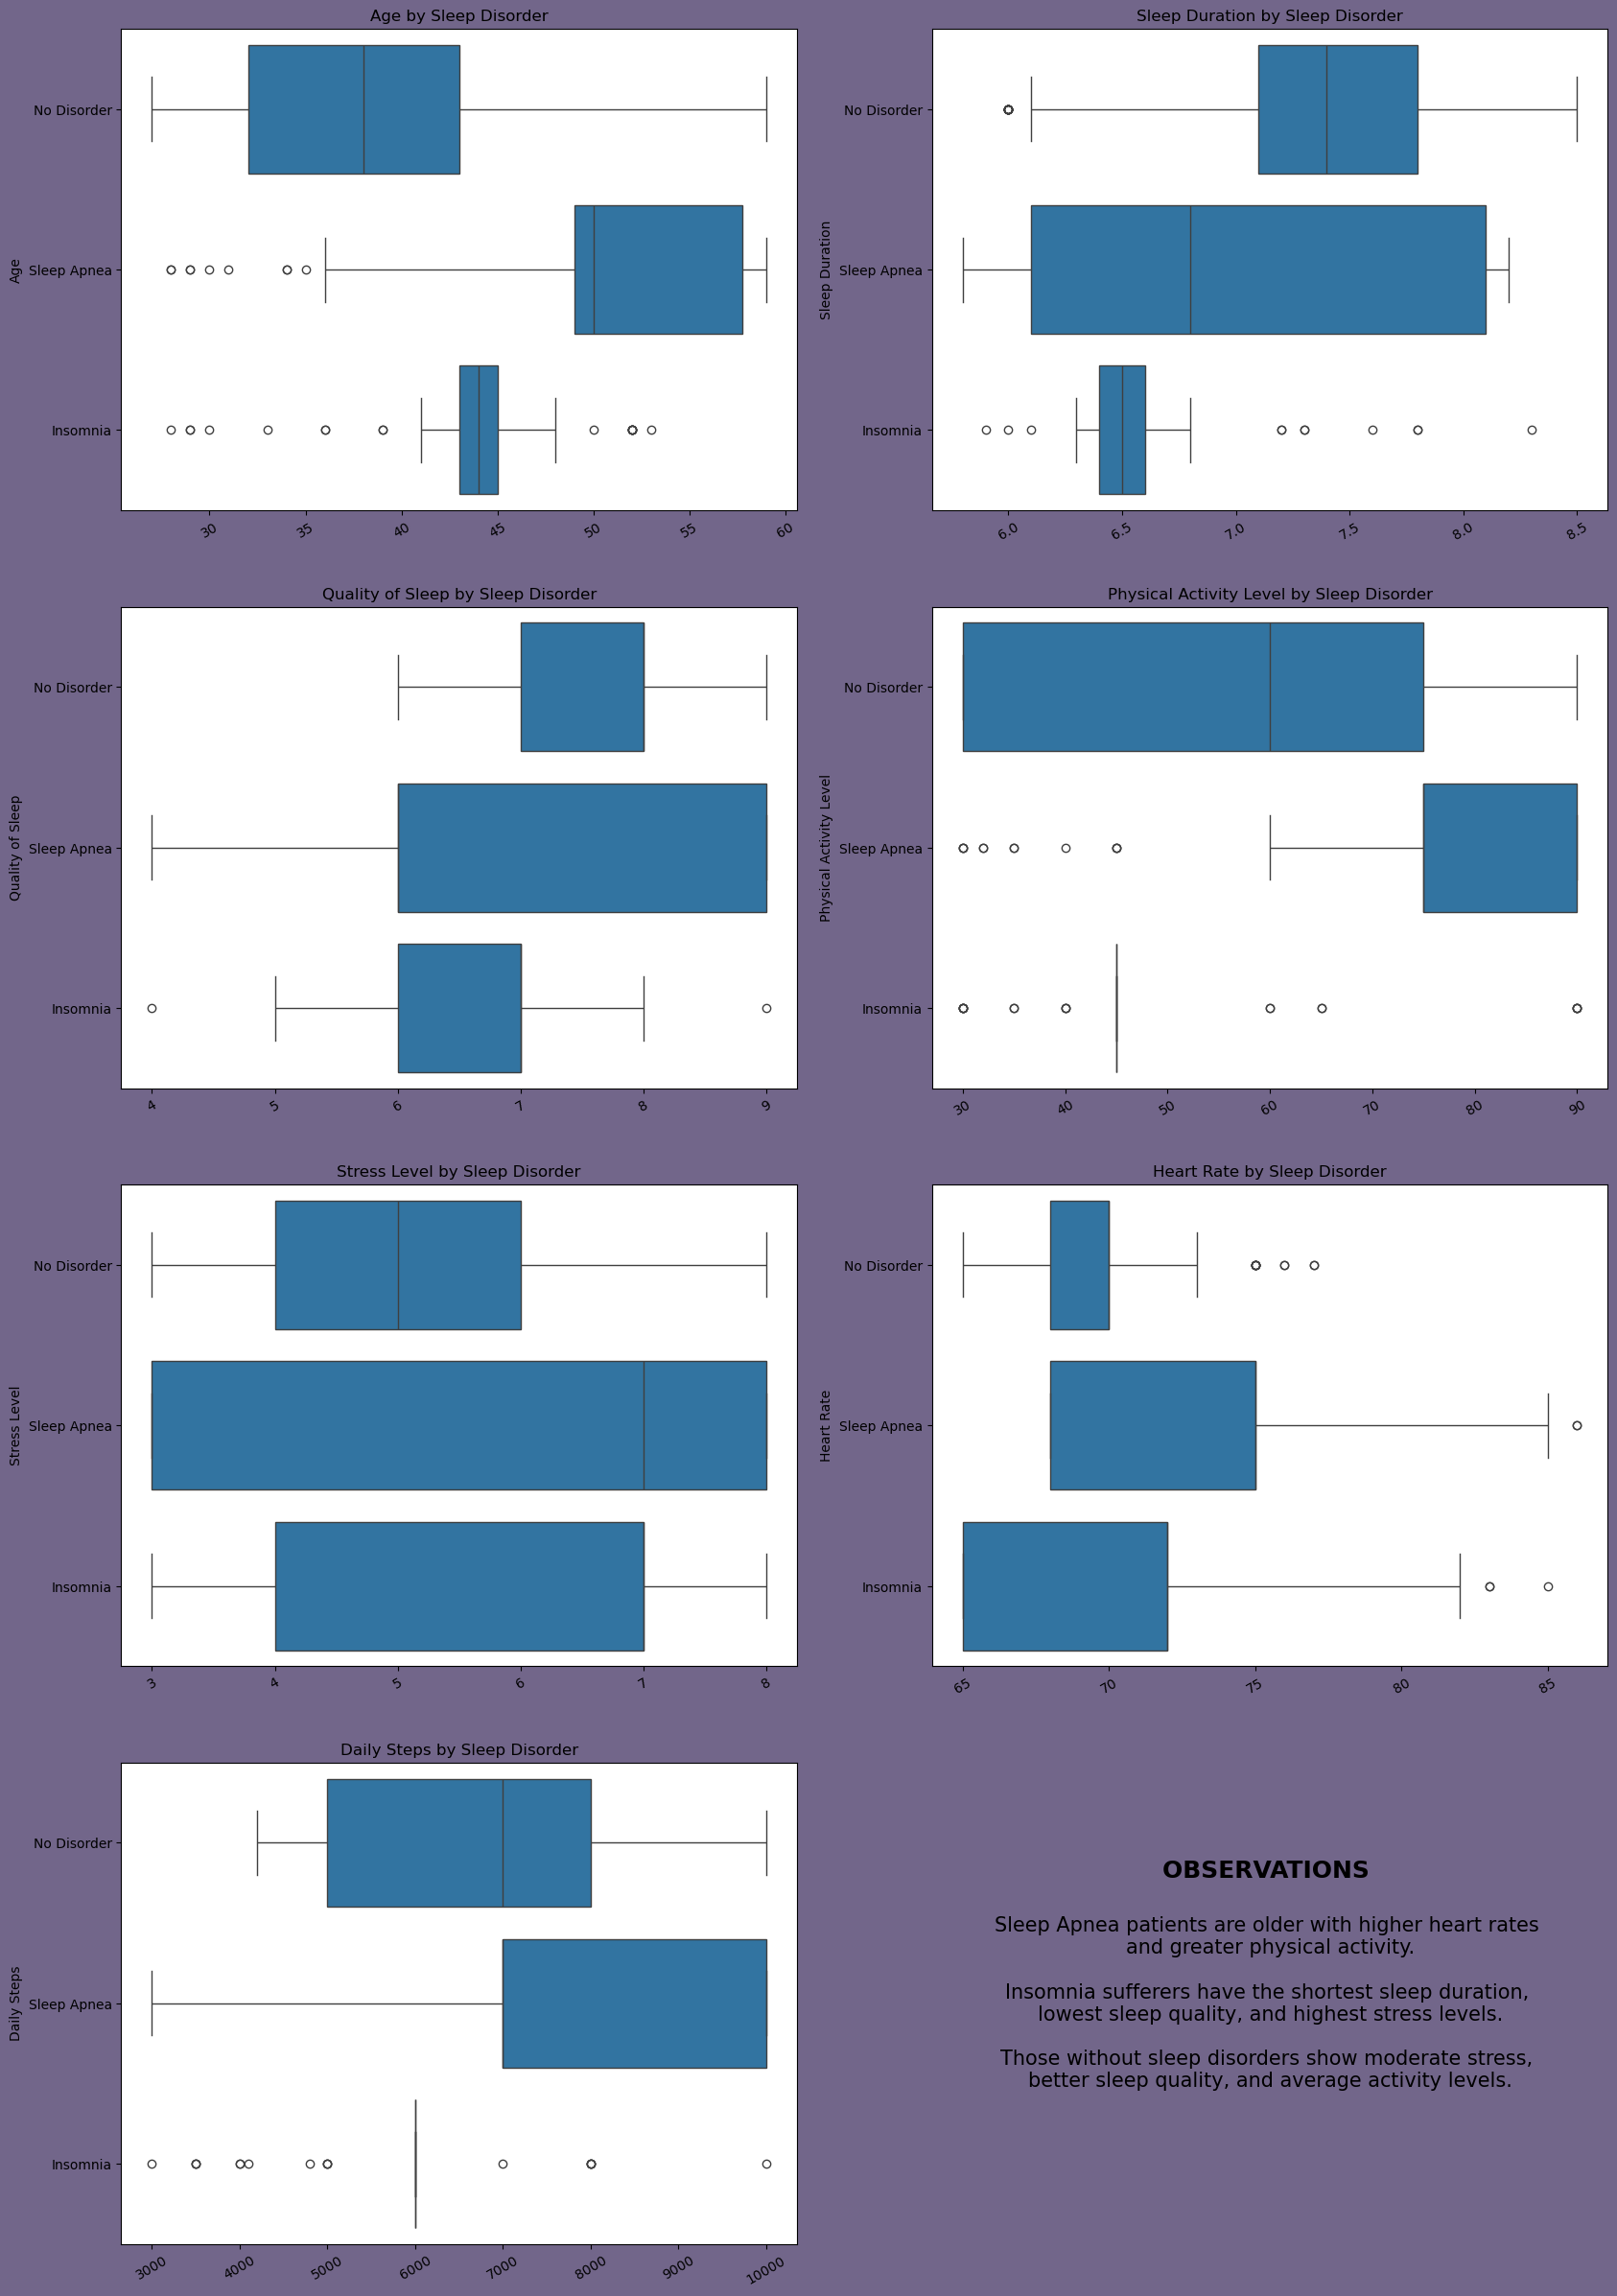

In [68]:
# Distribution of Key Numerical Variables Across Sleep Disorder Types
fig, axes = plt.subplots(4, 2, figsize=(20, 30)) 
axes = axes.flatten()
fig.patch.set_facecolor("#72668a")
for i, col in enumerate(nums_cols):
    sns.boxplot(data=data, y='Sleep Disorder', x=col, ax=axes[i])
    axes[i].set_title(f'{col} by Sleep Disorder')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)
    axes[i].tick_params(axis='x', rotation=30)

summary_text = (
    "Sleep Apnea patients are older with higher heart rates \nand greater physical activity.\n\n"
    "Insomnia sufferers have the shortest sleep duration, \nlowest sleep quality, and highest stress levels.\n\n"
    "Those without sleep disorders show moderate stress, \nbetter sleep quality, and average activity levels."
)
axes[7].axis("off")
axes[7].text(0.5,0.8,"OBSERVATIONS ",ha= "center" , va="top" , fontsize = 18 , weight = "bold")
axes[7].text(0.5,0.5,summary_text ,ha= "center" , va="center" , fontsize = 15)

plt.show()

## Observations 

- Sleep Apnea individuals are older on average (49.7 years) compared to Insomnia (43.5) and No Disorder (39.0).  
- People without sleep disorders sleep the longest (7.36 hrs), while Insomnia cases sleep the least (6.59 hrs).  
- Sleep quality is highest in the No Disorder group and lowest in those with Insomnia.  
- Sleep Apnea cases show the highest physical activity and daily steps, possibly due to medical advice or lifestyle.  
- Stress is highest in Insomnia cases (median = 7), which may contribute to poor sleep quality.  
- Sleep Apnea is associated with the highest heart rate, suggesting potential cardiovascular strain.

***
# Sleep Disorder Analysis Project Summary

### What I Found:

## 1. Sleep Duration and Quality:
- People who sleep around 7 to 8 hours usually have better sleep quality and fewer sleep problems.
- Sleeping too little or too much increases the chance of sleep disorders like insomnia and sleep apnea.

## 2. Stress Levels:
- Higher stress levels generally lead to worse sleep quality.
- Stress affects the type of sleep disorder: high stress is linked more to sleep apnea, while moderate stress is linked to insomnia.

## 3. Physical Activity and Steps:
- People who exercise about 60 minutes a day have better sleep health.
- Exercising too little or too much seems to increase the risk of sleep problems.
- The number of daily steps alone does not clearly protect against sleep disorders.

## 4. Body Mass Index (BMI) and Blood Pressure:
- People who are overweight or obese are more likely to have sleep disorders.
- High blood pressure, especially in the ranges 130/85 to 140/95 mmHg, increases sleep disorder risk.
- Obese nurses with high blood pressure are most likely to have sleep apnea.

## 5. Gender and Occupation:
- More females have sleep apnea compared to males.
- Nurses (mostly female) have the highest rate of sleep apnea.
- Salespersons and teachers often suffer from insomnia.
- Occupation is a strong factor affecting sleep health.

## 6. Combined Effects:
- Overweight or obese people with high blood pressure are at high risk of sleep disorders, especially if they are nurses, teachers, or salespersons.

## 7. Correlations and Key Features:
- Sleep quality and sleep duration are closely linked.
- Stress negatively affects sleep quality and duration.
- Blood pressure and occupation are the strongest factors related to sleep disorders.
- BMI and gender also matter, but less strongly.

### What This Means:
- To keep good sleep health, people should try to maintain a healthy weight, control their blood pressure, manage stress, and have balanced physical activity.
- Different jobs have different risks, so people in high-risk jobs like nursing should be especially careful.
- Sleep disorders are complex and depend on many things working together, not just one factor.

***


In [69]:
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


- Done with EDA - ss